<a href="https://colab.research.google.com/github/lilasu086/MachineLearning_USBankruptcy/blob/main/%20US%20Company%20Bankruptcy%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Colab Link:**

https://colab.research.google.com/drive/14wfN6q9cSq-w6vTqYDpSOqfuQAYxn3pD?usp=sharing

#**Project Theme: US Company Bankkruptcy Prediction**




**Team A08: Chih-Hsin (Olivia) Peng, Gaurangi Agrawal, Pei-Hsin (Bonny) Yang, Yu-Chun (Lila) Su**

##**1. Business Problem**

Our analysis involves a thorough examination of numerous feature variables that contain comprehensive information about financial statement indices, from Current Assets to Total Operating Expenses, which are essential in providing an in-depth understanding of a company's financial health. In addition to this, we incorporate the temporal dimension by including a year column, which enables us to unveil trends and conditions over time. Our primary objective is to leverage this extensive dataset to predict a company's financial stability or its likelihood of facing bankruptcy.

##**2. Data Source + Variable Description**

The dataset we have chosen is from Kaggle, and the company name in the dataset is related to the American public company, which is listed on the New York Stock Exchange and NASDAQ.


| Variable Name                 | Description                                                        |
|------------------------------|--------------------------------------------------------------------|
| company-name                 | Name of the company                |
| year                         | Operating years of the company     |
| status_label                 | Tells us whether the company has declared bankruptcy or not. 1 - Alive/ Not Bankrupt : 0 - Failed/ Bankrupt     |
| X1                           | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year.  |
| X2                           | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products. |
| X3                           | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time. |
| X4                           | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                           | Inventory - The accounting of items and raw materials that a company either uses in production or sells. |
| X6                           | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue. |
| X7                           | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers. |
| X8                           | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                           | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts. |
| X10                          | Total assets - All the assets, or items of value, a business owns. |
| X11                          | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date. |
| X12                          | EBIT - Earnings before interest and taxes. |
| X13                          | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services. |
| X14                          | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining. |
| X15                          | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                          | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments. |
| X17                          | Total Liabilities - The combined debts and obligations that the company owes to outside parties. |
| X18                          | Total Operating Expenses - The expenses a business incurs through its normal business operations. |

##**3. Who cares about this problem & why?**


Knowing who is concerned about a particular issue offers different perspectives. Firstly, for a company, understanding its financial health guides its future plans. If a company faces money troubles, it might find ways to earn more, spend less on making things, or seek outside help, like selling company shares or bonds. This understanding helps companies change how they work to stay financially strong.

At the same time, investors focus on how a company's finances affect their investments. They want to put money where they think it'll grow. By looking at a company's past finances, investors can guess if it might close down or not make money. Using this info, they decide where to keep investing and where to pull back. So, knowing a company's financial situation is crucial for both the company itself and the people investing in it. Predicting if a company will do well or not guides the actions of both businesses and investors.

##**4. Data Preprocessing**

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/american_bankruptcy.csv')

# rename the column's name
df.rename(columns={'status_label' : 'is_bankruptcy','X1': 'Current assets', 'X2': 'Cost of goods sold', 'X3': 'Depreciation and amortization', 'X4': 'EBITDA', 'X5': 'Inventory','X6': 'Net Income', 'X7': 'Total Receivables', 'X8': 'Market Value', 'X9': 'Net Sales', 'X10': 'Total Assets','X11': 'Total Long-term Debt', 'X12': 'EBIT', 'X13': 'Gross Profit', 'X14': 'Total Current Liabilities', 'X15': 'Retained Earnings', 'X16': 'Total Revenue', 'X17': 'Total Liabilities', 'X18': 'Total Operating Expenses'},inplace=True)

# set 'company_name' and 'year' as duel index
df.set_index(['company_name', 'year'],inplace=True)

# change 'is_bankruptcy' column into 0 = failed / 1 = alive
# set(df['status_label']) == {'alive', 'failed'}
mapping = {'alive':0, 'failed':1}
df['is_bankruptcy'] = df['is_bankruptcy'].replace(mapping)

##**5. Feature Selection**

In [ ]:
# pre-processing the train/ test dataset, handling the missing value, and standardize the variables
X = df.drop('is_bankruptcy',axis=1)
y = df['is_bankruptcy']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# dealing with null value before using ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
                               # after handling the missing value, standardize the numerical variables

from sklearn.compose import ColumnTransformer
numerical_variable = ['Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market Value', 'Net Sales', 'Total Assets',
       'Total Long-term Debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses']

transformer = ColumnTransformer([('numerical_variable',numeric_pipeline,numerical_variable)])
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('transformer',transformer),('LogisticRegression',LogisticRegression(random_state=42))])
pipelineX = df.drop('is_bankruptcy',axis=1)
y = df['is_bankruptcy']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


# dealing with null value before using ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
                               # after handling the missing value, standardize the numerical variables

from sklearn.compose import ColumnTransformer
numerical_variable = ['Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market Value', 'Net Sales', 'Total Assets',
       'Total Long-term Debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses']

transformer = ColumnTransformer([('numerical_variable',numeric_pipeline,numerical_variable)])
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('transformer',transformer),('LogisticRegression',LogisticRegression(random_state=42))])
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical_variable',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Current assets',
                                                   'Cost of goods sold',
                                                   'Depreciation and '
                                                   'amortization',
                                                   'EBITDA', 'Inventory',
                                                   'Net Income',
                                                   'Total Receivables',
                                                   'Market Value', 'Net Sales',
                                                   'Total Assets',
                                                   'Total Long-term Debt',
                                                   'EBIT', 'Gross Profit',
                                                   'Total Current Liabilities',
                                                   'Retained Earnings',
                                                   'Total Revenue',
                                                   'Total Liabilities',
                                                   'Total Operating '
                                                   'Expenses'])])),
                ('LogisticRegression', LogisticRegression(random_state=42))])

###**5.1 Select KBest**

In [ ]:
# step 1: use SelectKBest to pick the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # because I get numerical input and a categorical target variable, so choose f_classif to make the calculation
best_k_select = SelectKBest(score_func=f_classif)

# step 2: re-define the pipeline you want to put in GridSearchCV
best_k_select_pipeline = Pipeline([('transformer',transformer),('select',best_k_select),('LogisticRegression',LogisticRegression(random_state=42))])

# step 3: use gridsearch to find the best features
from sklearn.model_selection import GridSearchCV
param_grid = {'select__k': range(1, X_train.shape[1] + 1)}
grid_search = GridSearchCV(estimator=best_k_select_pipeline, param_grid=param_grid,cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train,y_train)

# step 4: after fitting, show the result
# 4-1
result = pd.DataFrame(grid_search.cv_results_)
#display(grid_search_all_result)
result = result.sort_values(by='mean_test_score',ascending=False)
display(result.filter(regex= '(^param_|mean_test_score)', axis=1))
                    # regular expression
                             # ^ : start from
                             # | : or
# 4-2
final_pick = grid_search.best_estimator_
print('The selected features are=\n', final_pick["transformer"].get_feature_names_out()[final_pick["select"].get_support()])

,param_select__k,mean_test_score
17,18,0.503538
16,17,0.502628
15,16,0.502628
14,15,0.501163
13,14,0.501163
12,13,0.501163
11,12,0.500528
9,10,0.500334
10,11,0.500187
6,7,0.499957


The selected features are=
 ['numerical_variable__Current assets'
 'numerical_variable__Cost of goods sold'
 'numerical_variable__Depreciation and amortization'
 'numerical_variable__EBITDA' 'numerical_variable__Inventory'
 'numerical_variable__Net Income' 'numerical_variable__Total Receivables'
 'numerical_variable__Market Value' 'numerical_variable__Net Sales'
 'numerical_variable__Total Assets'
 'numerical_variable__Total Long-term Debt' 'numerical_variable__EBIT'
 'numerical_variable__Gross Profit'
 'numerical_variable__Total Current Liabilities'
 'numerical_variable__Retained Earnings'
 'numerical_variable__Total Revenue'
 'numerical_variable__Total Liabilities'
 'numerical_variable__Total Operating Expenses']


###**5.2 Select From Model**

In [ ]:
# step 1: decide use SelectFromModel to select the best features, and decide to use Lasso model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
select_from_model = SelectFromModel(Lasso())

# step 2: re-define the pipeline, so you can put in GridSearchCV
select_from_model_pipeline = Pipeline([('transformer',transformer),('select',select_from_model),('LogisticRegression',LogisticRegression(random_state=42))])

# step 3: use gridsearch to find the best features
from sklearn.model_selection import GridSearchCV
param_grid = {'select__estimator__alpha': [10, 100, 1000],'select__threshold': ['mean', 'median']}
grid_search = GridSearchCV(estimator=select_from_model_pipeline,param_grid = param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

# step 4: after fitting, show the result
# 4-1
result = pd.DataFrame(grid_search.cv_results_)
result = result.sort_values(by="mean_test_score", ascending=False)
display(result.filter(regex='(^param_|mean_test_score)', axis=1))
# 4-2
final_pick = grid_search.best_estimator_
print('The selected features are=\n', final_pick["transformer"].get_feature_names_out()[final_pick["select"].get_support()])

,param_select__estimator__alpha,param_select__threshold,mean_test_score
0,10,mean,0.503538
1,10,median,0.503538
2,100,mean,0.503538
3,100,median,0.503538
4,1000,mean,0.503538
5,1000,median,0.503538


The selected features are=
 ['numerical_variable__Current assets'
 'numerical_variable__Cost of goods sold'
 'numerical_variable__Depreciation and amortization'
 'numerical_variable__EBITDA' 'numerical_variable__Inventory'
 'numerical_variable__Net Income' 'numerical_variable__Total Receivables'
 'numerical_variable__Market Value' 'numerical_variable__Net Sales'
 'numerical_variable__Total Assets'
 'numerical_variable__Total Long-term Debt' 'numerical_variable__EBIT'
 'numerical_variable__Gross Profit'
 'numerical_variable__Total Current Liabilities'
 'numerical_variable__Retained Earnings'
 'numerical_variable__Total Revenue'
 'numerical_variable__Total Liabilities'
 'numerical_variable__Total Operating Expenses']


###**5.3 Recursive Feature Elimination**

In [ ]:
# step 1: decide to use RFECV to select the best features
from sklearn.feature_selection import RFECV
rfecv = RFECV(LogisticRegression(random_state=42), scoring='balanced_accuracy')

# step 2: re-define the pipeline, add 'select' in to the previous pipeline
rfecv_pipeline = Pipeline([('transformer',transformer),('select',rfecv),('LogisticRegression',LogisticRegression(random_state=42))])
rfecv_pipeline.fit(X_train, y_train)

# step 3: show the result
print('Optimal number of features',rfecv.n_features_)
# .n_features_: attributes of rfecv, shows the number of selected features after the recursive feature elimination process
print('The selected features are=\n', rfecv_pipeline['transformer'].get_feature_names_out()[rfecv.support_])

Optimal number of features 12
The selected features are=
 ['numerical_variable__Current assets' 'numerical_variable__EBITDA'
 'numerical_variable__Inventory' 'numerical_variable__Net Income'
 'numerical_variable__Total Receivables'
 'numerical_variable__Market Value'
 'numerical_variable__Total Long-term Debt' 'numerical_variable__EBIT'
 'numerical_variable__Gross Profit'
 'numerical_variable__Total Current Liabilities'
 'numerical_variable__Retained Earnings'
 'numerical_variable__Total Liabilities']


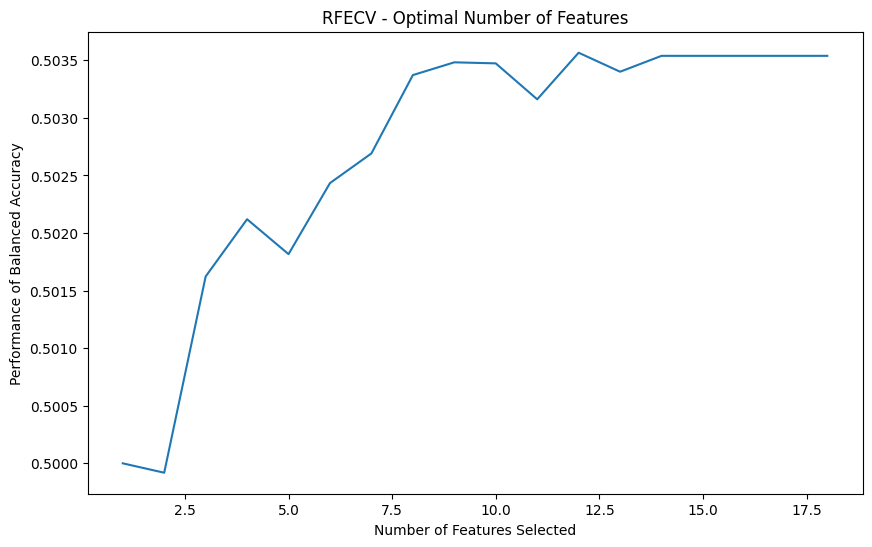

In [ ]:
# step 4: plot
plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Performance of Balanced Accuracy")
mean_test_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_test_score ) + 1), mean_test_score);

###**5.4 Sequential Feature Selection: Forward and Backward**

In [ ]:
# default: forward
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LogisticRegression(random_state=42), k_features="best", scoring='balanced_accuracy',forward=True)

sfs_pipeline = Pipeline([('transformer',transformer),('select',sfs)])
sfs_pipeline.fit(X_train, y_train)

all_result = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
display(all_result.sort_values(by='avg_score',ascending=False))

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000553,0.00043,0.000215
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000553,0.00043,0.000215
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000553,0.00043,0.000215
14,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16)","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16)",0.000553,0.00043,0.000215
13,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16)","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16)",0.000553,0.00043,0.000215
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5035889196963023, 0.5038300988665965, 0.503...",0.503538,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000333,0.000259,0.00013
9,"(4, 5, 6, 7, 9, 10, 11, 12, 16)","[0.5043231150613701, 0.5032311163304729, 0.502...",0.503299,"(4, 5, 6, 7, 9, 10, 11, 12, 16)",0.000886,0.000689,0.000345
11,"(2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 16)","[0.5043231150613701, 0.5032311163304729, 0.502...",0.503299,"(2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 16)",0.000886,0.000689,0.000345
10,"(2, 4, 5, 6, 7, 9, 10, 11, 12, 16)","[0.5043231150613701, 0.5032311163304729, 0.502...",0.503299,"(2, 4, 5, 6, 7, 9, 10, 11, 12, 16)",0.000886,0.000689,0.000345
8,"(4, 6, 7, 9, 10, 11, 12, 16)","[0.5043684624221537, 0.5033671584128236, 0.502...",0.503224,"(4, 6, 7, 9, 10, 11, 12, 16)",0.000861,0.00067,0.000335


In [ ]:
# back
from mlxtend.feature_selection import SequentialFeatureSelector
sbs = SequentialFeatureSelector(LogisticRegression(random_state=42), k_features="best", scoring='balanced_accuracy',forward=False)

sbs_pipeline = Pipeline([('transformer',transformer),('select',sbs)])
sbs_pipeline.fit(X_train, y_train)

all_result = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
display(all_result.sort_values(by='avg_score',ascending=False))

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 3, 4, 6, 7, 10, 12, 13, 16)","[0.5042777677005865, 0.5047918602889889, 0.502...",0.503785,"(0, 3, 4, 6, 7, 10, 12, 13, 16)",0.001068,0.000831,0.000415
16,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.5049212683440871, 0.5040114883097309, 0.503...",0.503731,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15...",0.001066,0.00083,0.000415
15,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...","[0.5049212683440871, 0.5040114883097309, 0.503...",0.503731,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...",0.001066,0.00083,0.000415
14,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17)","[0.5049212683440871, 0.5040114883097309, 0.503...",0.503731,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17)",0.001066,0.00083,0.000415
13,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 16)","[0.5049212683440871, 0.5040114883097309, 0.503...",0.503731,"(0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 16)",0.001066,0.00083,0.000415
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5043231150613701, 0.5038300988665965, 0.503...",0.503685,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000553,0.00043,0.000215
10,"(0, 3, 4, 6, 7, 9, 10, 12, 13, 16)","[0.5042777677005865, 0.5041475303920817, 0.502...",0.503665,"(0, 3, 4, 6, 7, 9, 10, 12, 13, 16)",0.000884,0.000688,0.000344
11,"(0, 3, 4, 6, 7, 9, 10, 11, 12, 13, 16)","[0.5042777677005865, 0.5040114883097309, 0.503...",0.503629,"(0, 3, 4, 6, 7, 9, 10, 11, 12, 13, 16)",0.000838,0.000652,0.000326
12,"(0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 16)","[0.5042777677005865, 0.5040114883097309, 0.503...",0.503611,"(0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 16)",0.00086,0.000669,0.000335
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5035889196963023, 0.5038300988665965, 0.503...",0.503538,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000333,0.000259,0.00013


In this project, although we considered models like KNN and Random Forest for training, our final choice for feature selection was logistic regression. Logistic regression was preferred for its simplicity, computational efficiency, interpretability, and its suitability for binary classification.

The process involved employing various methods for feature selection. SelectKBest recommended including all 18 features. SelectFromModel, using L1 regularization, also suggested including all features. Recursive feature elimination proposed retaining 12 features. Additionally, forward and backward sequential feature selection advised including 17 and 9 features, respectively. Surprisingly, most methods recommended retaining all features despite different approaches.

##**6. Dataset Exploration**

###**Some Interesting Descriptive Analysis**

We initiated our examination of the dataset, noting its emphasis on financial statements—spanning from Current Assets to Total Operating Expenses. This aligns well with our analysis objectives, leveraging the readily available and crucial financial data for a comprehensive understanding of a company's financial health. This is also the reason why the correlation bewteen each variables is relatively high, as shown in correlation matrix. The inclusion of a year column allows us to uncover trends and conditions over time. If a company declared bankruptcy the previous year, it does not appear in the subsequent year.

Moving on to basic statistical analysis, we find the significantly larger number of alive companies compared to those declaring bankruptcy. This presents a notable challenge, which we will delve into in more detail in our subsequent analyses. We can also observe there is a substantial difference between alive companies and failed companies.

In [ ]:
# show some basic information about the dataset
print('top 5 row of the dataset:')
display(df.head(5))
print()
print('info about the dataset:')
display(df.info())
print()
print('check if there are any NULL value in the dataset:')
display(df.isna().sum())
print()
print('basic statistics about the dataset (include = "number"):')
display(df.describe(include = 'number'))
print()

top 5 row of the dataset:


is_bankruptcy  Current assets  Cost of goods sold  \
company_name year                                                      
C_1          1999              0         511.267             833.107   
             2000              0         485.856             713.811   
             2001              0         436.656             526.477   
             2002              0         396.412             496.747   
             2003              0         432.204             523.302   

                   Depreciation and amortization  EBITDA  Inventory  \
company_name year                                                     
C_1          1999                         18.373  89.031    336.018   
             2000                         18.577  64.367    320.590   
             2001                         22.496  27.207    286.588   
             2002                         27.172  30.745    259.954   
             2003                         26.680  47.491    247.245   

                   Net Income  Total Receivables  Market Value  Net Sales  \
company_name year                                                           
C_1          1999      35.163            128.348      372.7519   1024.333   
             2000      18.531            115.187      377.1180    874.255   
             2001     -58.939             77.528      364.5928    638.721   
             2002     -12.410             66.322      143.3295    606.337   
             2003       3.504            104.661      308.9071    651.958   

                   Total Assets  Total Long-term Debt    EBIT  Gross Profit  \
company_name year                                                             
C_1          1999       740.998               180.447  70.658       191.226   
             2000       701.854               179.987  45.790       160.444   
             2001       710.199               217.699   4.711       112.244   
             2002       686.621               164.658   3.573       109.590   
             2003       709.292               248.666  20.811       128.656   

                   Total Current Liabilities  Retained Earnings  \
company_name year                                                 
C_1          1999                    163.816            201.026   
             2000                    125.392            204.065   
             2001                    150.464            139.603   
             2002                    203.575            124.106   
             2003                    131.261            131.884   

                   Total Revenue  Total Liabilities  Total Operating Expenses  
company_name year                                                              
C_1          1999       1024.333            401.483                   935.302  
             2000        874.255            361.642                   809.888  
             2001        638.721            399.964                   611.514  
             2002        606.337            391.633                   575.592  
             2003        651.958            407.608                   604.467


info about the dataset:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78682 entries, ('C_1', 1999) to ('C_8971', 2018)
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   is_bankruptcy                  78682 non-null  int64  
 1   Current assets                 78682 non-null  float64
 2   Cost of goods sold             78682 non-null  float64
 3   Depreciation and amortization  78682 non-null  float64
 4   EBITDA                         78682 non-null  float64
 5   Inventory                      78682 non-null  float64
 6   Net Income                     78682 non-null  float64
 7   Total Receivables              78682 non-null  float64
 8   Market Value                   78682 non-null  float64
 9   Net Sales                      78682 non-null  float64
 10  Total Assets                   78682 non-null  float64
 11  Total Long-term Debt           78682 non-null  float64
 12

None


check if there are any NULL value in the dataset:


is_bankruptcy                    0
Current assets                   0
Cost of goods sold               0
Depreciation and amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market Value                     0
Net Sales                        0
Total Assets                     0
Total Long-term Debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
dtype: int64


basic statistics about the dataset (include = "number"):


,is_bankruptcy,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,0.066343,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,0.248882,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,0.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,0.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,0.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,0.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,1.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


Text(0.5, 1.0, 'Correlation between each variable')

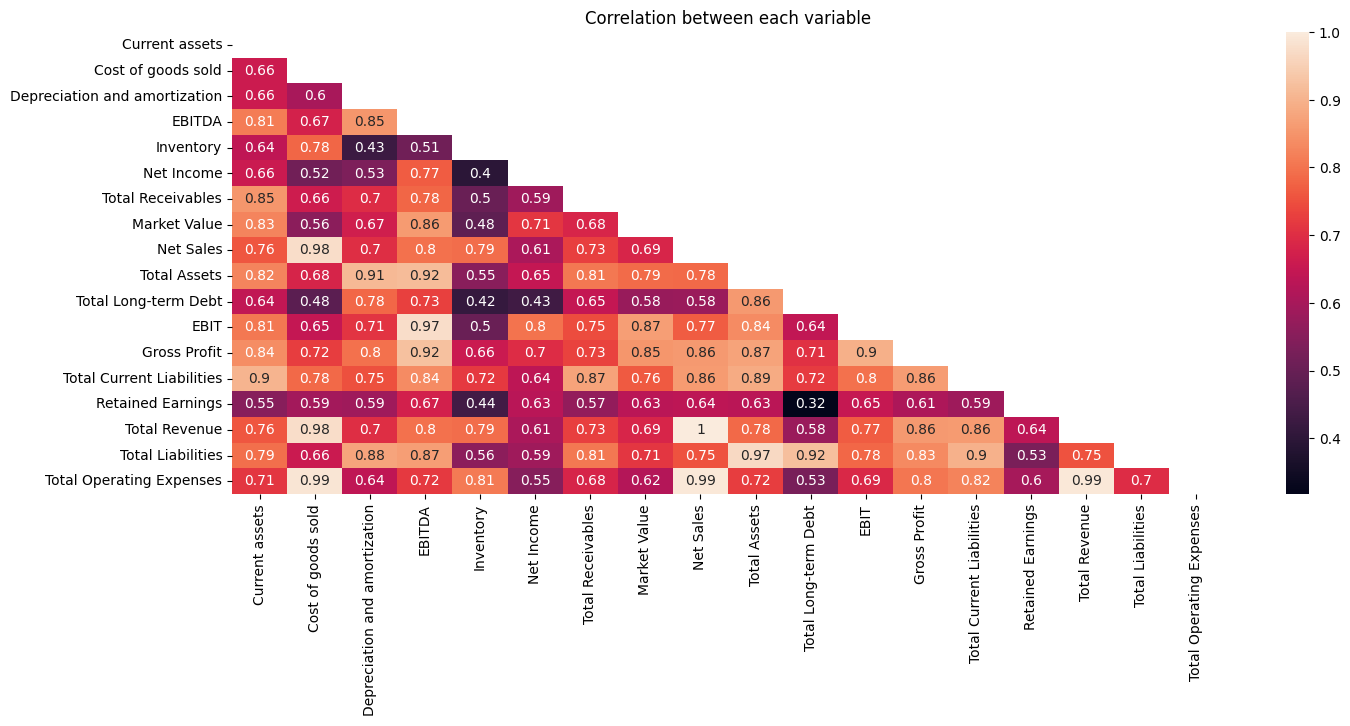

In [ ]:
# find the correlation between each numerical variables: shows in heatmap
df_correlation = df.drop(['is_bankruptcy'],axis=1)

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_correlation.corr(), dtype=bool))
heatmap = sns.heatmap(df_correlation.corr(),mask=mask,annot=True,cbar=True)
heatmap.set_title("Correlation between each variable", fontdict={'fontsize': 12})

In [ ]:
alivedf = df[df['is_bankruptcy']==0]
faileddf = df[df['is_bankruptcy']==1]

year
1999    380
2000    404
2001    414
2002    414
2003    415
2004    404
2005    379
2006    366
2007    336
2008    284
2009    234
2010    218
2011    194
2012    182
2013    167
2014    142
2015    111
2016     83
2017     57
2018     36
dtype: int64


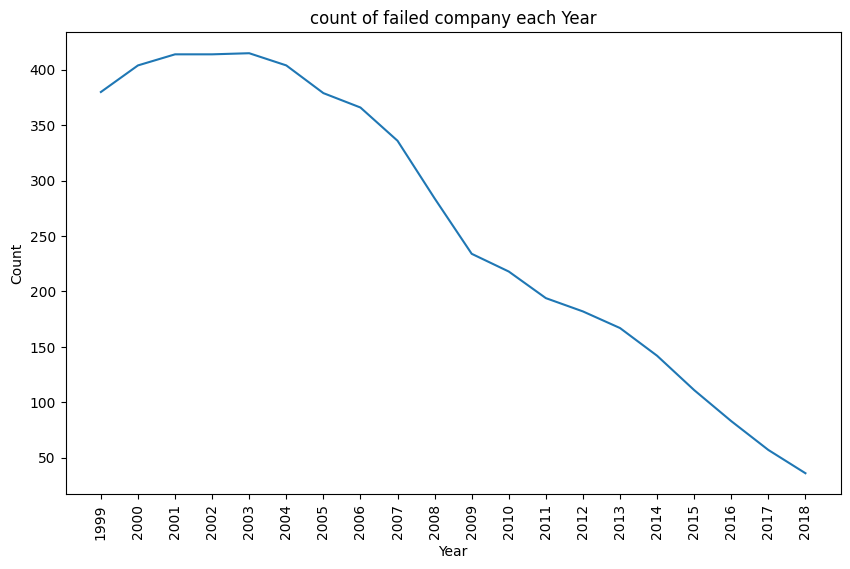

In [ ]:
year_counts = faileddf.groupby(level='year').size()
print(year_counts)

plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', xlabel='Year', ylabel='Count', title='count of failed company each Year')
plt.xticks(year_counts.index,rotation=90)
plt.show()

In [ ]:
print('basic statistics about the alive company dataset (include = "number"):')
display(alivedf.describe(include = 'number'))
print('basic statistics about the failed company dataset (include = "number"):')
display(faileddf.describe(include = 'number'))

basic statistics about the alive company dataset (include = "number"):


,is_bankruptcy,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,73462.0,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,7.346200e+04,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.0,914.542615,1646.982563,123.746364,393.684586,208.560102,141.994726,297.794547,3.596015e+03,2447.871581,2952.555391,730.516984,269.938080,800.889131,628.748794,582.034710,2447.871581,1809.571974,2054.187022
std,0.0,4052.047889,9210.587641,671.282060,2076.601504,1089.918086,1299.259556,1377.396592,1.902253e+04,12326.442146,13290.496814,3309.223955,1542.468732,3896.084871,3021.687870,6570.280016,12326.442146,8257.442726,10744.450269
min,0.0,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,0.0,19.235250,17.013500,1.185250,-0.658000,0.000000,-6.484750,3.373000,3.590370e+01,27.748000,37.736750,0.000000,-2.421750,8.807250,8.795250,-63.599750,27.748000,13.318250,32.921250
50%,0.0,102.917500,103.534000,7.935000,15.618000,7.117000,2.071500,23.454000,2.408953e+02,187.070000,215.006000,7.092500,7.181000,64.823000,43.359500,-0.172500,187.070000,80.740500,170.290500
75%,0.0,450.041750,652.468750,48.001750,144.679000,76.787750,43.444000,136.101500,1.324400e+03,1083.655000,1198.552000,245.000000,92.542000,356.430750,228.800000,158.556000,1083.655000,634.293250,903.576250
max,0.0,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


basic statistics about the failed company dataset (include = "number"):


,is_bankruptcy,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,5220.0,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,1.0,399.339353,856.340997,85.880919,138.568576,103.735398,-48.112333,132.565307,857.813011,1183.957172,1664.630981,609.430007,52.687657,327.616175,347.233954,-165.107267,1183.957172,1266.816748,1045.388596
std,0.0,1147.837282,2767.913221,268.526753,521.284649,482.368932,592.050918,421.691639,3396.453790,3567.878694,5284.035224,2077.661309,381.853579,967.555853,1254.398961,1849.943497,3567.878694,4221.179588,3297.762745
min,1.0,0.001000,-0.666000,0.000000,-5062.000000,0.000000,-27446.000000,0.000000,0.002000,0.001000,0.015000,0.000000,-10537.000000,-4141.334000,0.005000,-43091.000000,0.001000,0.005000,-0.016000
25%,1.0,15.315750,17.251500,1.314750,-4.241500,0.076750,-26.038750,2.241750,26.351225,23.961750,33.025000,0.184000,-9.470250,5.128750,10.015250,-140.766250,23.961750,16.381750,32.143500
50%,1.0,75.871500,106.638500,7.846500,7.790000,6.171000,-3.327000,15.218000,117.799400,180.834500,195.137000,18.438500,0.487000,47.500000,42.911000,-25.506000,180.834500,97.035000,155.727000
75%,1.0,269.113500,468.845500,47.442000,85.700000,52.033500,9.203250,79.708250,495.970825,719.763500,847.652750,287.792250,37.993500,228.636750,160.958750,37.572750,719.763500,574.765500,617.029000
max,1.0,16548.000000,40683.000000,5475.000000,6136.000000,9963.000000,5996.417000,8207.000000,139092.655000,53012.000000,76995.000000,21586.000000,4822.000000,15192.000000,41695.000000,7832.000000,53012.000000,64092.000000,49363.000000


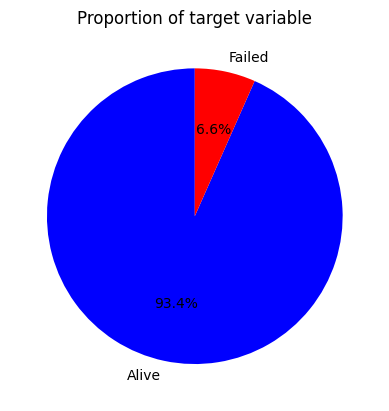

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
bankruptcy_data = {'Alive': 73462, 'Failed': 5220}

plt.pie(bankruptcy_data.values(), labels=bankruptcy_data.keys(), autopct='%1.1f%%', startangle=90,colors=['blue', 'red'])
plt.title('Proportion of target variable');


The pie chart presented above unmistakably illustrates a substantial degree of class imbalance within the dataset concerning the target variable. Faced with this challenge, our approach involved the implementation of various techniques to address dataset imbalance comprehensively. Strategies employed included SMOTE (Synthetic Minority Over-sampling Technique), K-Fold Cross-Validation, Bootstrap, and the integration of Balanced Weights.

In our pursuit of mitigating class imbalances, these diverse techniques were systematically applied, each bringing its unique strengths to the endeavor. SMOTE facilitated the generation of synthetic samples for the minority class, K-Fold Cross-Validation enabled robust model evaluation, Bootstrap resampling provided enhanced training data diversity, and Balanced Weights contributed to equitable consideration of minority and majority classes during model training.

##**7. Model Selection**

  Premise: We opt to employ KNN (k Nearest Neighbours), Logistic Regression, Random Forest Classifier, SVM (Support Vector Machine) and Voting Classifier for making the prediction.

  We have defined the Model Workflow about our notebook.

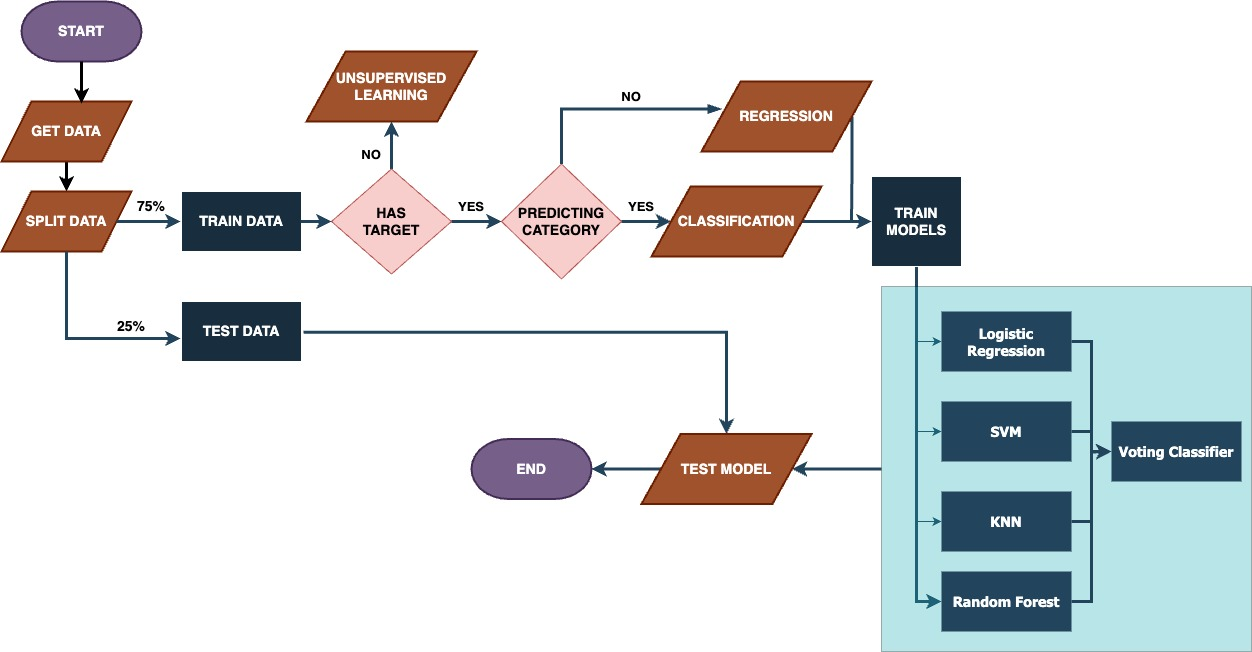

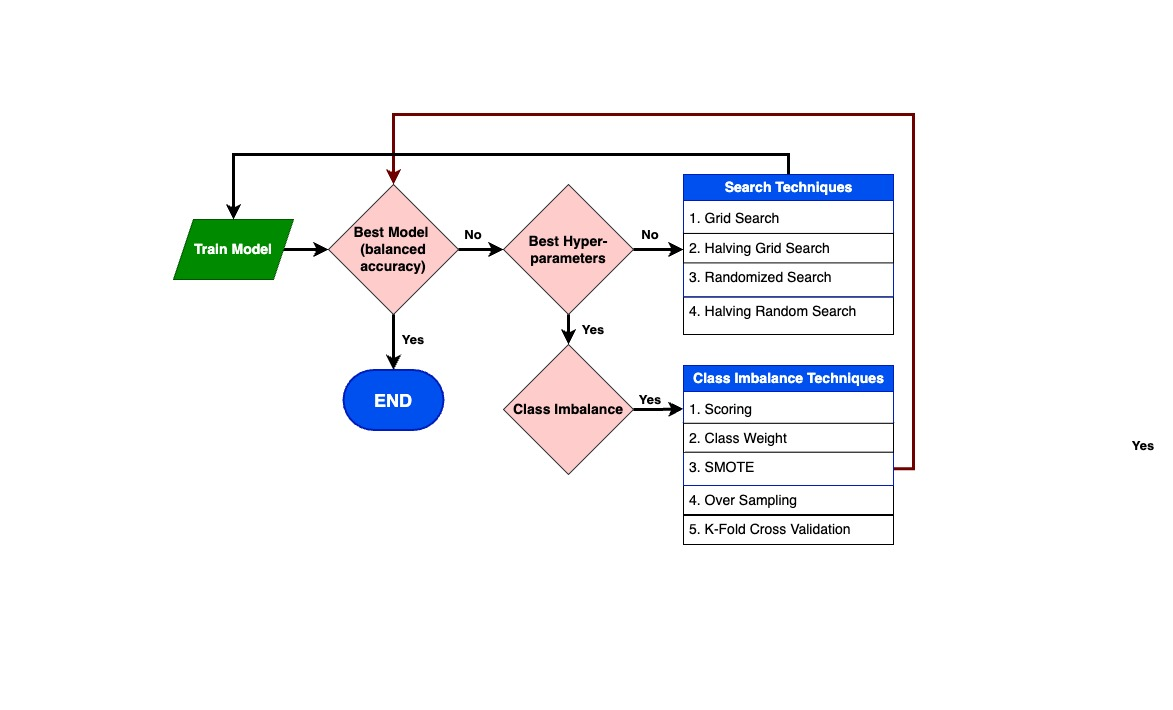

**Train and Test data split**

In [ ]:
X = df.drop('is_bankruptcy',axis=1)
y = df['is_bankruptcy']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder())
    ])

pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])

To make it easier for implementation we tried to define functions for the evaluation of the model.

**Accuracy and Balanced Accuracy**

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

def calculate_accuracy(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  as CMD

def c_matrix(y_test, y_pred, pipe_line):
  cm = confusion_matrix(y_test, y_pred)
  print("confusion matrix=\n")
  display(cm)
  print()
  # display confusion metrix in chart
  image = CMD(cm , display_labels = pipe_line.classes_)
  image.plot(cmap='coolwarm')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

def class_report(y_test, y_pred):
  class_report = classification_report(y_test, y_pred)
  print('classification report=\n', class_report)

**ROC Curve**

In [ ]:
from sklearn.metrics import RocCurveDisplay

def roc_curve(pipe_line, X_test, y_test):
  RocCurveDisplay.from_estimator(pipe_line, X_test, y_test)

**Cost Matrix**

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def self_define_cost(y_test,y_prediction_binary):
  cm = confusion_matrix(y_test, y_prediction_binary)
  return cm[0,1]*1 + cm[1,0]*10

def cost_matrix(pipe_line, X_train, y_train):
  custom_cost = make_scorer(self_define_cost)
  cost_simple_pipeline = cross_val_score(pipe_line,X_train,y_train,scoring=custom_cost,cv=5)
  print('average cost for simple pipeline=',cost_simple_pipeline.mean())

###**7.1 Logistic Regression**

####**Model Training & Evaluation**



In [ ]:
from sklearn.linear_model import LogisticRegression
simple_pipeline = Pipeline([('preprocessor',pipeline), ('classifier',LogisticRegression(random_state=42))])
simple_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
simple_pipeline.fit(X_train,y_train) # make a training data


# probaability outcomes
y_prediction_prob = simple_pipeline.predict_proba(X_test)[:, 1] # make the prediction, the result is shown in probability(y=1)
print('prediction_probability=',y_prediction_prob)

# change it into binary outcomes
threshold = 0.5 # default
y_prediction_binary = (y_prediction_prob >= threshold).astype(int)
print('prediction_binary=',y_prediction_binary)

# Create a DataFrame with the predicted outcomes and set the index
result = pd.DataFrame({
    'probability': y_prediction_prob,
    'is_bankrupt': y_prediction_binary
}, index=X_test.index)
result

prediction_probability= [0.07176234 0.06008078 0.07089656 ... 0.07501865 0.06558447 0.00627952]
prediction_binary= [0 0 0 ... 0 0 0]


,,probability,is_bankrupt
company_name,year,,
C_6246,2000,0.071762,0
C_7120,2016,0.060081,0
C_8737,2016,0.070897,0
C_6107,1999,0.072156,0
C_761,2002,0.073810,0
...,...,...,...
C_4035,2004,0.070763,0
C_1651,2009,0.073674,0
C_8176,2008,0.075019,0


#####**Balanced Accuracy Score**

In [ ]:
calculate_accuracy(y_test, y_prediction_binary)

Accuracy=0.9320, Balanced Accuracy=0.5031


#####**Confusion Matrix**

confusion matrix=



array([[18324,     8],
       [ 1330,     9]])

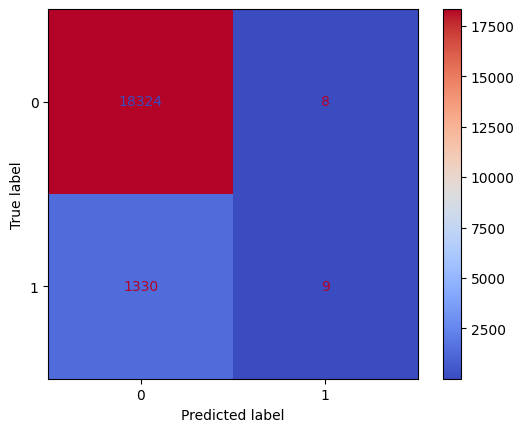

In [ ]:
c_matrix(y_test, y_prediction_binary, simple_pipeline)

#####**Classification Report**

In [ ]:
class_report(y_test, y_prediction_binary)

classification report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     18332
           1       0.53      0.01      0.01      1339

    accuracy                           0.93     19671
   macro avg       0.73      0.50      0.49     19671
weighted avg       0.90      0.93      0.90     19671



#####**ROC Curve**

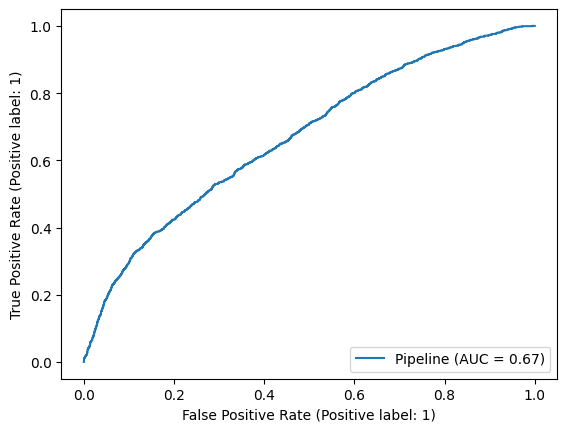

In [ ]:
roc_curve(simple_pipeline, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(simple_pipeline,X_train,y_train)

average cost for simple pipeline= 7709.2


####**Parameter Tuning**

#####**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid= {'LogisticRegression__penalty':['l1', 'l2'],'LogisticRegression__C':[0.1, 1.0, 10.0],'LogisticRegression__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(estimator=simple_pipeline, param_grid=param_grid,cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train,y_train)

grid_search_all_result = pd.DataFrame(grid_search.cv_results_)
#display(grid_search_all_result)
result = grid_search_all_result.sort_values(by='mean_test_score',ascending=False)
display(result.filter(regex= '(^param_|mean_test_score)', axis=1).head())
                    # regular expression
                             # ^ : start from
                             # | : or
print()
print('The best parameters are=', grid_search.best_params_)

,param_LogisticRegression__C,param_LogisticRegression__class_weight,param_LogisticRegression__penalty,mean_test_score
3,0.1,balanced,l2,0.594286
7,1.0,balanced,l2,0.594026
11,10.0,balanced,l2,0.593970
9,10.0,None,l2,0.503778
5,1.0,None,l2,0.503538



The best parameters are= {'LogisticRegression__C': 0.1, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__penalty': 'l2'}


#####**HalvingGridSearchCV**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid= {'LogisticRegression__penalty':['l1', 'l2'],'LogisticRegression__C':[0.1, 1.0, 10.0],'LogisticRegression__class_weight': [None, 'balanced']}

halving_grid_search = HalvingGridSearchCV(estimator=simple_pipeline,param_grid=param_grid,cv=5, scoring='balanced_accuracy',min_resources='exhaust')
halving_grid_search.fit(X_train,y_train)

halving_grid_search_all_result = pd.DataFrame(halving_grid_search.cv_results_)
#display(halving_grid_search_all_result)
result = halving_grid_search_all_result.sort_values(by=['iter','mean_test_score'],ascending=False)
display(result.filter(regex='^param_|mean_test_score',axis=1).head())
                    # regular expression
                             # ^ : start from
                             # | : or
print()
print('The best parameters are=', halving_grid_search.best_params_)

,param_LogisticRegression__C,param_LogisticRegression__class_weight,param_LogisticRegression__penalty,mean_test_score
16,10.0,balanced,l2,0.594007
17,1.0,balanced,l2,0.594000
13,1.0,balanced,l2,0.595186
15,10.0,balanced,l2,0.594675
14,0.1,balanced,l2,0.592788



The best parameters are= {'LogisticRegression__C': 10.0, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__penalty': 'l2'}


#####**RandomSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs= {'LogisticRegression__penalty':['l1', 'l2'],'LogisticRegression__C':[0.1, 1.0, 10.0],'LogisticRegression__class_weight': [None, 'balanced']}

random_search = RandomizedSearchCV(estimator=simple_pipeline,param_distributions=param_distribs,n_iter=20,cv=5,scoring='balanced_accuracy',random_state=42)
random_search.fit(X_train,y_train)

random_search_all_result = pd.DataFrame(random_search.cv_results_)
#display(random_search_all_result)
result = random_search_all_result.sort_values(by='mean_test_score',ascending=False)
display(result.filter(regex = '^param_|mean_test_score',axis=1).head())
print()
print('The best parameters are=', random_search.best_params_)

,param_LogisticRegression__penalty,param_LogisticRegression__class_weight,param_LogisticRegression__C,mean_test_score
3,l2,balanced,0.1,0.594286
7,l2,balanced,1.0,0.594026
11,l2,balanced,10.0,0.593970
9,l2,None,10.0,0.503778
5,l2,None,1.0,0.503538



The best parameters are= {'LogisticRegression__penalty': 'l2', 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__C': 0.1}


#####**HalvingRandomSearchCV**

In [ ]:
# halving random search
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

param_distribs= {'LogisticRegression__penalty':['l1', 'l2'],'LogisticRegression__C':[0.1, 1.0, 10.0],'LogisticRegression__class_weight': [None, 'balanced']}

halving_random_search = HalvingRandomSearchCV(estimator=simple_pipeline,param_distributions=param_distribs,n_candidates=20,cv=5,scoring='balanced_accuracy',random_state=42,min_resources='exhaust')
halving_random_search.fit(X_train,y_train)

halving_random_search_all_result = pd.DataFrame(halving_random_search.cv_results_)
#display(halving_random_search_all_result)
result = halving_random_search_all_result.sort_values(by=['iter','mean_test_score'],ascending=False)
display(result.filter(regex='^param|mean_test_score',axis=1).head())
print()
print('The best parameters are=', halving_random_search.best_params_)

,param_LogisticRegression__penalty,param_LogisticRegression__class_weight,param_LogisticRegression__C,params,mean_test_score
16,l2,balanced,0.1,"{'LogisticRegression__penalty': 'l2', 'Logisti...",0.594235
17,l2,balanced,10.0,"{'LogisticRegression__penalty': 'l2', 'Logisti...",0.593991
14,l2,balanced,10.0,"{'LogisticRegression__penalty': 'l2', 'Logisti...",0.589938
13,l2,balanced,0.1,"{'LogisticRegression__penalty': 'l2', 'Logisti...",0.589215
15,l2,balanced,1.0,"{'LogisticRegression__penalty': 'l2', 'Logisti...",0.588895



The best parameters are= {'LogisticRegression__penalty': 'l2', 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__C': 0.1}


####**Model Retraining**

In [ ]:
# after find the best parameters, re-predict the X_test
advanced_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('classifier', LogisticRegression(random_state=42, penalty='l2', class_weight='balanced', C=0.1))])
advanced_pipeline.fit(X_train,y_train)

# probaability outcomes
y_prediction_prob = advanced_pipeline.predict_proba(X_test)[:, 1]
print('prediction_probability=',y_prediction_prob)

# change it into binary outcomes
threshold = 0.5 # default
y_prediction_binary = (y_prediction_prob >= threshold).astype(int)
print('prediction_binary=',y_prediction_binary)

# Create a DataFrame with the predicted outcomes and set the index
result = pd.DataFrame({
    'probability': y_prediction_prob,
    'is_bankrupt': y_prediction_binary
}, index=X_test.index)
result

prediction_probability= [0.56034198 0.47455307 0.51861262 ... 0.52252278 0.48669172 0.06608786]
prediction_binary= [1 0 1 ... 1 0 0]


,,probability,is_bankrupt
company_name,year,,
C_6246,2000,0.560342,1
C_7120,2016,0.474553,0
C_8737,2016,0.518613,1
C_6107,1999,0.522009,1
C_761,2002,0.518097,1
...,...,...,...
C_4035,2004,0.532785,1
C_1651,2009,0.518733,1
C_8176,2008,0.522523,1


####**Model Revaluation**

#####**Balanced Accuracy Score**

In [ ]:
calculate_accuracy(y_test,y_prediction_binary)

Accuracy=0.3629, Balanced Accuracy=0.5945


#####**Confusion Matrix**

confusion matrix=



array([[ 5984, 12348],
       [  184,  1155]])

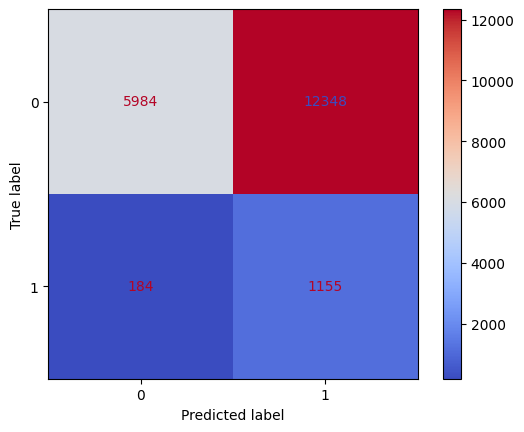

In [ ]:
c_matrix(y_test, y_prediction_binary, advanced_pipeline)

#####**Classification Report**

In [ ]:
class_report(y_test, y_prediction_binary)

classification report=
               precision    recall  f1-score   support

           0       0.97      0.33      0.49     18332
           1       0.09      0.86      0.16      1339

    accuracy                           0.36     19671
   macro avg       0.53      0.59      0.32     19671
weighted avg       0.91      0.36      0.47     19671



#####**ROC Curve**

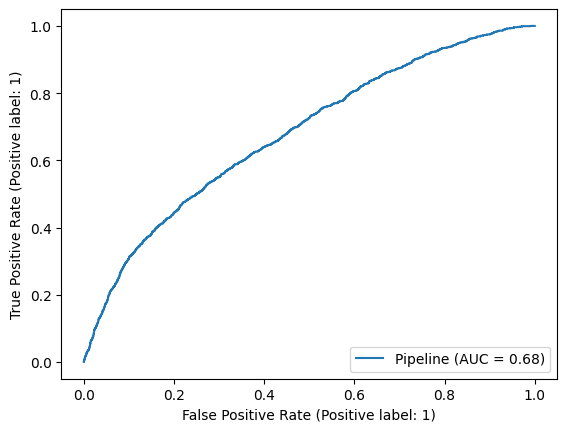

In [ ]:
roc_curve(advanced_pipeline, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(advanced_pipeline,X_train,y_train)

average cost for simple pipeline= 8480.0


####**Techniques for Dataset Imbalance**

Premise:
Enhance the advanced_pipeline to assess accuracy, enabling improved predictions on unseen data using k-fold and bootstrap resampling.







#####**K-fold**

In [ ]:
# k-fold
from sklearn.model_selection import cross_val_score
cv = cross_val_score(advanced_pipeline, X_train,y_train,cv=5,scoring='balanced_accuracy')
print('accuracy after using cv=',cv.mean())

accuracy after using cv= 0.5942864150883247


#####**Bootstrap**

In [ ]:
# bootstrap
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
import numpy as np

def bootstrap(model, X_train, y_train, X_test, y_test, n_iterations=100):
    accuracy_scores = []

    for times in range(n_iterations):
        # Bootstrap resampling on the minority class
        X_resample, y_resample = resample(X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples=X_train[y_train == 0].shape[0])
        X_resample = np.concatenate((X_resample, X_train[y_train == 0]), axis=0)  # Combine minority and majority class along axis 0
        y_resample = np.concatenate((y_resample, y_train[y_train == 0]), axis=0)
        X_resample = pd.DataFrame(X_resample, columns=['Current assets',
       'Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'Market Value',
       'Net Sales', 'Total Assets', 'Total Long-term Debt', 'EBIT',
       'Gross Profit', 'Total Current Liabilities', 'Retained Earnings',
       'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'])
        y_resample = pd.DataFrame(y_resample, columns=['is_bankruptcy'])

        model.fit(X_resample, y_resample)
        y_pred = model.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return np.array(accuracy_scores)

bootstrap_scores = bootstrap(advanced_pipeline, X_train, y_train, X_test, y_test)
print("Balanced accuracy after using bootstrap:", bootstrap_scores.mean())

Balanced accuracy after using bootstrap: 0.5953791681828338


#####**SMOTE Technique**

In [ ]:
#smote
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score

smote = SMOTE(random_state=42)

# Create the pipeline
logis_smote_pipe = Pipeline([
    ('transformer',pipeline),
    ('smote', smote),
    ('LogisticRegression', LogisticRegression(random_state=42, penalty='l2', class_weight='balanced', C=0.1))
])

logis_smote_pipe.fit(X_train, y_train)
y_pred2_smote = logis_smote_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2_smote)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred2_smote)
print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

Accuracy=0.3701, Balanced Accuracy=0.5946



Following the training and prediction phase of our Logistic Regression model, we identified the optimal hyperparameters using the Halving Random Search method. The hyperparameters that yielded the best performance were found to be penalty='l2', class_weight='balanced', and C=0.1.

Incorporating bootstrapping techniques, our model achieved a balanced accuracy of 0.5953. This signifies a balanced and robust predictive capability, especially crucial in scenarios where the dataset is imbalanced.

The adoption of Halving Random Search not only facilitated the discovery of hyperparameters that enhance model performance but also underscored the effectiveness of an intelligent search strategy in navigating the hyperparameter space. This comprehensive approach ensures that our Logistic Regression model is fine-tuned for optimal performance, laying the foundation for reliable predictions in the face of imbalanced data.

###**7.2 Random Forest**

####**Model Training**

In [ ]:
#create pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', rf)
])

#fit a RandomForestClassifier classifier
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
transformed_data = pipeline.fit_transform(df[['Current assets','Cost of goods sold','Depreciation and amortization','EBITDA','Inventory','Net Income','Total Receivables',
           'Market Value','Net Sales','Total Assets','Total Long-term Debt','EBIT','Gross Profit','Total Current Liabilities','Retained Earnings',
           'Total Revenue','Total Liabilities','Total Operating Expenses']])
transformed_df = pd.DataFrame(transformed_data, columns=pipeline.get_feature_names_out())
transformed_df

,num__Current assets,num__Cost of goods sold,num__Depreciation and amortization,num__EBITDA,num__Inventory,num__Net Income,num__Total Receivables,num__Market Value,num__Net Sales,num__Total Assets,num__Total Long-term Debt,num__EBIT,num__Gross Profit,num__Total Current Liabilities,num__Retained Earnings,num__Total Revenue,num__Total Liabilities,num__Total Operating Expenses
0,-0.093952,-0.085262,-0.157673,-0.143005,0.126713,-0.074451,-0.118629,-0.165179,-0.112108,-0.164587,-0.167184,-0.123687,-0.153196,-0.151872,-0.052039,-0.112108,-0.170368,-0.100960
1,-0.100421,-0.098620,-0.157360,-0.155264,0.112169,-0.087593,-0.128480,-0.164942,-0.124667,-0.167617,-0.167326,-0.140325,-0.161351,-0.164949,-0.051562,-0.124667,-0.175315,-0.112996
2,-0.112944,-0.119597,-0.151353,-0.173733,0.080115,-0.148809,-0.156669,-0.165622,-0.144377,-0.166971,-0.155694,-0.167810,-0.174120,-0.156416,-0.061683,-0.144377,-0.170557,-0.132035
3,-0.123188,-0.122926,-0.144185,-0.171974,0.055006,-0.112042,-0.165057,-0.177638,-0.147087,-0.168796,-0.172054,-0.168571,-0.174823,-0.138341,-0.064116,-0.147087,-0.171591,-0.135482
4,-0.114078,-0.119952,-0.144939,-0.163651,0.043025,-0.099467,-0.136359,-0.168646,-0.143269,-0.167041,-0.146143,-0.157038,-0.169772,-0.162951,-0.062895,-0.143269,-0.169607,-0.132711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,-0.164731,-0.173697,-0.164232,-0.164584,-0.186875,-0.082275,-0.197599,-0.144340,-0.189104,-0.136865,-0.165883,-0.149872,-0.187726,-0.198027,-0.079190,-0.189104,-0.192171,-0.185099
78678,-0.197224,-0.171923,-0.120548,-0.086792,-0.187901,0.000241,-0.173823,-0.156771,-0.173462,-0.077504,0.014688,-0.064219,-0.142402,-0.177631,-0.058828,-0.173462,-0.110911,-0.182180
78679,-0.207810,-0.170815,-0.086112,-0.147966,-0.187625,-0.103376,-0.182913,-0.153984,-0.183612,-0.086769,-0.011874,-0.161599,-0.177156,-0.178435,-0.059055,-0.183612,-0.124581,-0.182009
78680,-0.189677,-0.171101,-0.085694,-0.152876,-0.188160,-0.118357,-0.194328,-0.163014,-0.184279,-0.087553,-0.008775,-0.168392,-0.178594,-0.179713,-0.062258,-0.184279,-0.123779,-0.181826


####**Model Evaluation**

#####**Balanced Accuracy Score**

In [ ]:
y_pred_prob = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)
calculate_accuracy(y_test, y_pred)

Accuracy=0.9343, Balanced Accuracy=0.5217


#####**Confusion Matrix**

confusion matrix=



array([[18320,    12],
       [ 1280,    59]])

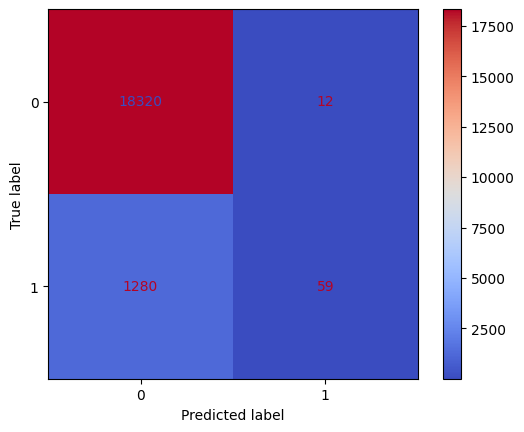

In [ ]:
c_matrix(y_test, y_pred, rf_pipeline)

#####**Classification Report**

In [ ]:
class_report(y_test, y_pred)

classification report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     18332
           1       0.83      0.04      0.08      1339

    accuracy                           0.93     19671
   macro avg       0.88      0.52      0.52     19671
weighted avg       0.93      0.93      0.91     19671



#####**ROC Curve**

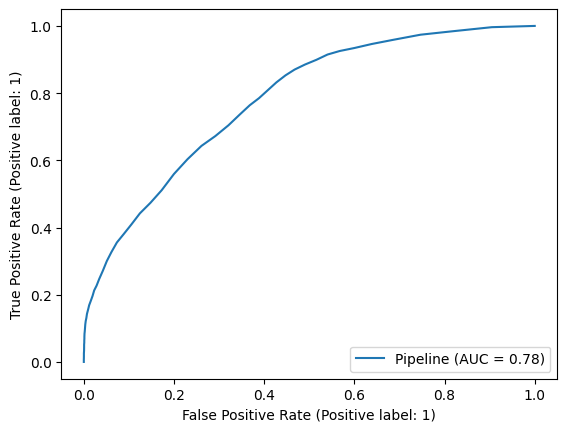

In [ ]:
roc_curve(rf_pipeline, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(rf_pipeline, X_train, y_train)

average cost for simple pipeline= 7304.0


#####**Feature importance**

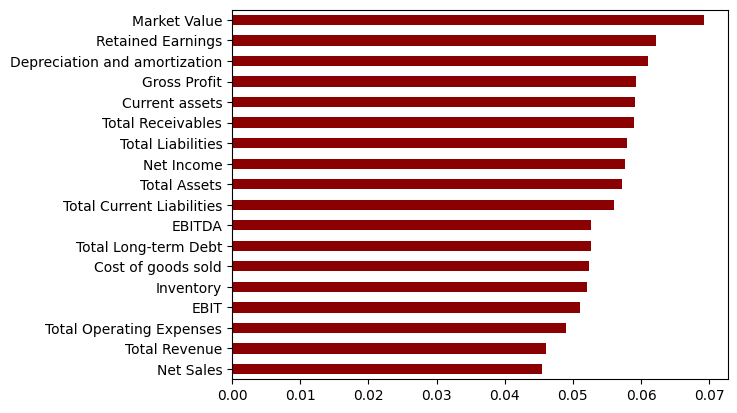

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='darkred'); plt.show()

####**Parameter Tuning**

#####**GridSearchCV**

In [ ]:
grid_max_depth = [None,2,5,10]
grid_min_samples_leaf = [1, 5, 10]
n_estimators = [100,200,300]


param_grid_g = [{'model__max_depth': grid_max_depth,
     'model__min_samples_leaf': grid_min_samples_leaf ,'model__n_estimators':n_estimators} ]

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid_g, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)
print('The best parameters are ', grid_search.best_params_)

The best parameters are  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}


In [ ]:
#show top5 parameters combinations
grid_cv_result = pd.DataFrame(grid_search.cv_results_)
grid_cv_result.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_result.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_model__max_depth,param_model__min_samples_leaf,param_model__n_estimators,mean_test_score
0,None,1,100,0.529578
1,None,1,200,0.529264
2,None,1,300,0.528988
3,None,5,100,0.508430
4,None,5,200,0.507933


#####**HalvingGridSearchCV**

In [ ]:
hgrid_max_depth = [None,2,5,10,12]
hgrid_min_samples_leaf = [1,5,10,15]
n_estimators = [100,200,300]

param_grid_hg = [{'model__max_depth': hgrid_max_depth,
     'model__min_samples_leaf': hgrid_min_samples_leaf ,'model__n_estimators':n_estimators} ]

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

hgrid_search = HalvingGridSearchCV(rf_pipeline, param_grid_hg, scoring='balanced_accuracy',random_state=42)
hgrid_search.fit(X_train, y_train)
print('The best parameters are ', hgrid_search.best_params_)


The best parameters are  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}


In [ ]:
hgrid_cv_results = pd.DataFrame(hgrid_search.cv_results_)
hgrid_cv_results.sort_values(by=['iter','mean_test_score'], ascending=False, inplace=True)
hgrid_cv_results.filter(regex = '(iter|^param_|mean_test_score)', axis=1).head()

,iter,param_model__max_depth,param_model__min_samples_leaf,param_model__n_estimators,mean_test_score
89,3,None,1,100,0.529603
88,3,None,1,300,0.529371
87,3,None,1,200,0.529362
86,2,None,1,100,0.513943
85,2,None,1,300,0.513207


#####**RandomSearchCV**

In [ ]:
random_max_depth = [None,25,40,55]
random_min_samples_leaf = list(range(1,20,5))


param_grid_r = [{'model__max_depth': random_max_depth,
     'model__min_samples_leaf': random_min_samples_leaf ,'model__n_estimators':n_estimators} ]

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(rf_pipeline, param_grid_r, scoring='balanced_accuracy',random_state=42)
random_search.fit(X_train, y_train)
print('The best parameters are ', random_search.best_params_)

The best parameters are  {'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__max_depth': 25}


In [ ]:
#show top5 parameters combinations
random_cv_result = pd.DataFrame(random_search.cv_results_)
random_cv_result.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_result.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_model__n_estimators,param_model__min_samples_leaf,param_model__max_depth,mean_test_score
6,100,1,25,0.529697
9,200,1,40,0.529530
2,300,1,40,0.529402
5,200,1,55,0.529264
4,100,1,40,0.529182


#####**HalvingRandomSearchCV**

In [ ]:
#HalvingRandomSearchCV
halving_max_depth = [None,30,50,70]
halving_min_samples_leaf = list(range(1,20,5))

param_grid_h = {'model__max_depth': halving_max_depth,
    'model__min_samples_leaf': halving_min_samples_leaf,'model__n_estimators':n_estimators}

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

halving_random_search = HalvingRandomSearchCV(rf_pipeline, param_grid_h, scoring='balanced_accuracy',random_state=42)
halving_random_search.fit(X_train, y_train)
print('The best parameters are ', halving_random_search.best_params_)

The best parameters are  {'model__n_estimators': 200, 'model__min_samples_leaf': 16, 'model__max_depth': 70}


In [ ]:
#show top5 parameters combinations
#incorporate 'iter' into sorting values(using most data)
hrandom_cv_results = pd.DataFrame(halving_random_search.cv_results_)
hrandom_cv_results.sort_values(by=['iter','mean_test_score'], ascending=False, inplace=True)
hrandom_cv_results.filter(regex = '(iter|^param_|mean_test_score)', axis=1).head()

,iter,param_model__n_estimators,param_model__min_samples_leaf,param_model__max_depth,mean_test_score
70,3,200,16,70,0.5
71,3,300,16,70,0.5
64,2,100,11,30,0.5
65,2,200,11,30,0.5
66,2,300,11,30,0.5


####**Model Retraining**

In [ ]:
rf2 = RandomForestClassifier(random_state=42, min_samples_leaf= 1, max_depth = 25, n_estimators = 100)

rf_pipeline2 = Pipeline([
    ('preprocessor', pipeline),
    ('model', rf2)
])

#fit a RandomForestClassifier classifier
rf_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('model',
                 RandomForestClassifier(max_depth=25, random_state=42))])

####**Model Reevaluation**

#####**Balanced Accuracy Score**

In [ ]:
y_pred_prob2 = rf_pipeline2.predict_proba(X_test)[:, 1]
y_pred2 = (y_pred_prob2 > 0.5).astype(int)
calculate_accuracy(y_test, y_pred2)

Accuracy=0.9355, Balanced Accuracy=0.5272


#####**Confusion Matrix**

confusion matrix=



array([[18330,     2],
       [ 1266,    73]])

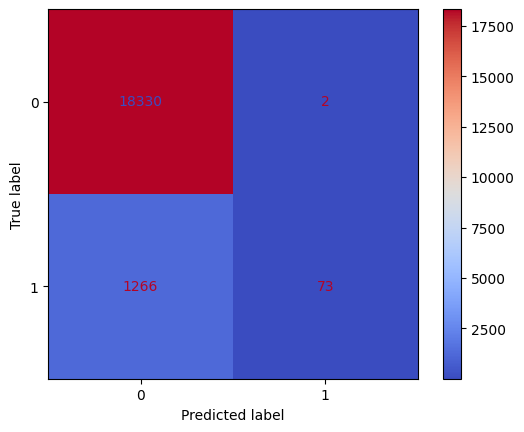

In [ ]:
c_matrix(y_test, y_pred2, rf_pipeline2)

#####**Classification Report**

In [ ]:
class_report(y_test, y_pred2)

classification report=
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18332
           1       0.97      0.05      0.10      1339

    accuracy                           0.94     19671
   macro avg       0.95      0.53      0.53     19671
weighted avg       0.94      0.94      0.91     19671



#####**ROC Curve**

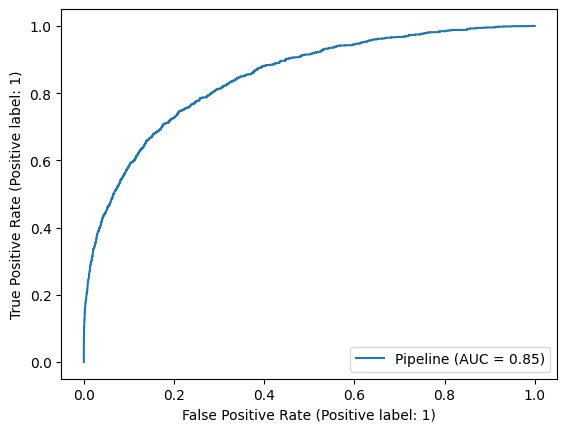

In [ ]:
roc_curve(rf_pipeline2, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(rf_pipeline2, X_train, y_train)

average cost for simple pipeline= 7302.2


####**Techniques for Dataset Imbalance**

#####**K-fold**

In [ ]:
#k-fold
from sklearn.model_selection import cross_val_score
cv2 = cross_val_score(rf_pipeline2,X_train,y_train,cv=5,scoring='balanced_accuracy')

print(f"Mean Balanced Accuracy: {np.mean(cv2):.4f}")

Mean Balanced Accuracy: 0.5297


#####**SMOTE Technique**

In [ ]:
#smote
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
smote = SMOTE(random_state=42)

# Create the pipeline
rf_smote_pipe = Pipeline([
    ('preprocessor', pipeline),
    ('smote', smote),
    ('model', rf2)
])

rf_smote_pipe.fit(X_train, y_train)
y_pred2_smote = rf_smote_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2_smote)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred2_smote)
print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

Accuracy=0.9123, Balanced Accuracy=0.7055



The initial implementation of the Random Forest model revealed a suboptimal balanced accuracy of 0.5217, prompting the adoption of a Random Search approach. This exploration led to the discovery of key hyperparameters—min_samples_leaf=1, max_depth=25, and n_estimators=100—that significantly improved model performance.

Upon retraining the model with these optimized hyperparameters and implementing strategies to tackle class imbalances, notably leveraging the SMOTE technique, we observed a substantial increase in balanced accuracy to a noteworthy level of 0.7055. This enhancement underscores the critical role of hyperparameter tuning and targeted handling of class imbalances, collectively contributing to the model's heightened predictive capabilities.

Notably, this refinement in the Random Forest model coincided with a remarkable increase in the AUC value, soaring from an initial 0.78 to an impressive 0.85. This noteworthy improvement in the AUC metric further accentuates the efficacy of our iterative and systematic approach. The model, now equipped with optimal hyperparameters and adept at addressing imbalanced data, stands as a testament to our commitment to refining its performance for robust and reliable predictions.

###**7.3 KNN**

####**Model Training**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('knn', KNeighborsClassifier())
])

knn_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('knn', KNeighborsClassifier())])

####**Model Evaluation**

In [ ]:
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

#####**Balanced Accuracy Score**

In [ ]:
calculate_accuracy(y_test, y_pred)

Accuracy=0.9385, Balanced Accuracy=0.6029


#####**Confusion Matrix**

confusion matrix=



array([[18174,   158],
       [ 1052,   287]])

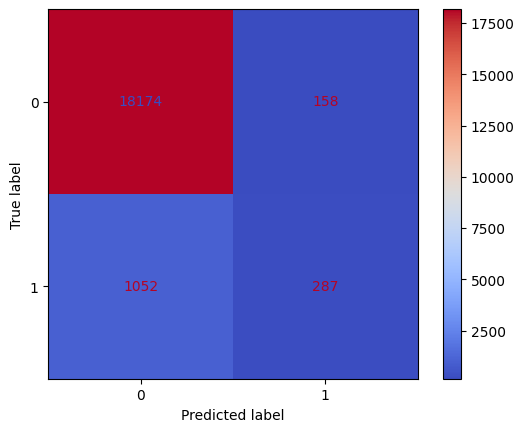

In [ ]:
c_matrix(y_test, y_pred, knn_pipeline)

#####**Classification Report**

In [ ]:
class_report(y_test, y_pred)

classification report=
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18332
           1       0.64      0.21      0.32      1339

    accuracy                           0.94     19671
   macro avg       0.80      0.60      0.64     19671
weighted avg       0.92      0.94      0.92     19671



#####**ROC Curve**

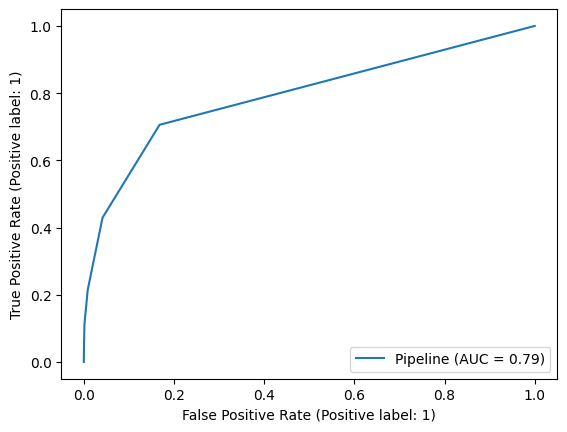

In [ ]:
roc_curve(knn_pipeline, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(knn_pipeline, X_train, y_train)

average cost for simple pipeline= 6379.4


####**Parameter Tuning**

#####**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'knn__n_neighbors': np.arange(2, 11, 2),
     'knn__p': [1, 2]
     },
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=3, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'knn__n_neighbors': array([ 2,  4,  6,  8, 10]), 'knn__p': [1, 2]}]


The best parameters are  {'knn__n_neighbors': 2, 'knn__p': 1}


,param_knn__n_neighbors,param_knn__p,mean_test_score
0,2,1,0.603385
1,2,2,0.592317
2,4,1,0.573312
3,4,2,0.562930
4,6,1,0.550195


#####**HalvingGridSearchCV**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {'knn__n_neighbors': np.arange(2, 11, 2),
     'knn__p': [1, 2]
     },
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

# Change to new strategy starting here
halving_grid_search = HalvingGridSearchCV(knn_pipeline, param_grid, cv=3,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='balanced_accuracy')
halving_grid_search.fit(X_train, y_train)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()

The parameter grid : 
[{'knn__n_neighbors': array([ 2,  4,  6,  8, 10]), 'knn__p': [1, 2]}]
The best parameters are  {'knn__n_neighbors': 2, 'knn__p': 1}


,iter,n_resources,param_knn__n_neighbors,param_knn__p,mean_test_score
15,2,59004,2,1,0.603410
14,2,59004,2,2,0.592340
13,1,19668,2,1,0.542865
12,1,19668,2,2,0.536418
11,1,19668,4,1,0.521296


#####**RandomSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = [  # compare to the grid verson: following lines have distributions, not values.
    {'knn__n_neighbors': randint(2, 10),
     'knn__p': [1, 2]
     },
    ]

random_search = RandomizedSearchCV(knn_pipeline, param_distribs, n_iter=5, cv=3,
                                 scoring='balanced_accuracy', random_state=42)
random_search.fit(X_train, y_train)
print('The best parameters are ', random_search.best_params_)

random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The best parameters are  {'knn__n_neighbors': 4, 'knn__p': 2}


,param_knn__n_neighbors,param_knn__p,mean_test_score
2,4,2,0.562930
1,6,1,0.550195
3,6,1,0.550195
0,8,2,0.535366
4,8,2,0.535366


#####**HalvingRandomSearchCV**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import randint

param_distribs = [
    {'knn__n_neighbors': randint(2, 10),
     'knn__p': [1, 2]
     },
    ]
# This is where we switch to halving version ...
halving_random_search = HalvingRandomSearchCV(knn_pipeline, param_distribs,
                                      n_candidates=5, cv=3,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=42)
halving_random_search.fit(X_train, y_train)
print('The best parameters are ', halving_random_search.best_params_)

halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_random_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()

The best parameters are  {'knn__n_neighbors': 4, 'knn__p': 2}


,iter,n_resources,param_knn__n_neighbors,param_knn__p,mean_test_score
6,1,59010,4,2,0.562930
5,1,59010,6,1,0.550195
2,0,19670,4,2,0.521509
1,0,19670,6,1,0.512701
3,0,19670,6,1,0.512701


####**Model Retraining**

In [ ]:
knn_pipeline_new = Pipeline([
    ('preprocessing', pipeline),
    ('knn', KNeighborsClassifier(p=1, n_neighbors=2))
])

####**Model Reevaluation**

In [ ]:
knn_pipeline_new.fit(X_train, y_train)
y_pred = knn_pipeline_new.predict(X_test)

#####**Balanced Accuracy**

In [ ]:
calculate_accuracy(y_test, y_pred)

Accuracy=0.9465, Balanced Accuracy=0.6341


#####**Confusion Matrix**

confusion matrix=



array([[18253,    79],
       [  974,   365]])

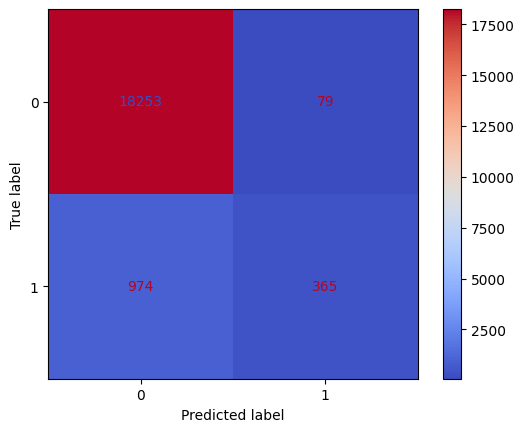

In [ ]:
c_matrix(y_test, y_pred, knn_pipeline_new)

#####**Classification Report**

In [ ]:
class_report(y_test, y_pred)

classification report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18332
           1       0.82      0.27      0.41      1339

    accuracy                           0.95     19671
   macro avg       0.89      0.63      0.69     19671
weighted avg       0.94      0.95      0.93     19671



#####**ROC Curve**

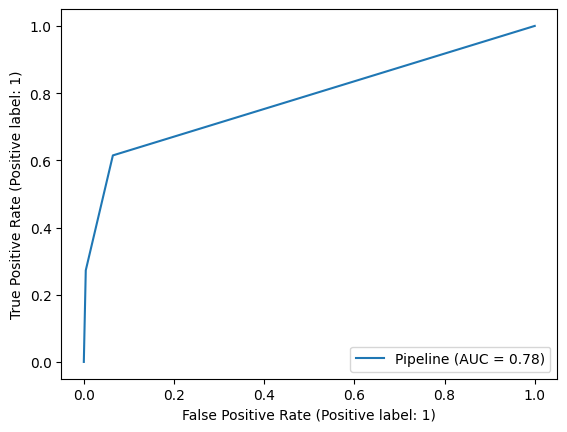

In [ ]:
roc_curve(knn_pipeline_new, X_test, y_test)

#####**Cost Matrix**

In [ ]:
cost_matrix(knn_pipeline_new, X_train, y_train)

average cost for simple pipeline= 5977.0


####**Techniques for Dataset Imbalance**

#####**K-fold**

In [ ]:
# k-fold
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_pipeline_new, X_train, y_train, cv=5, scoring='balanced_accuracy')
print(f'The balanced accuracy of K Nearest Neighbor is {knn_scores.mean():.3f}.')

The balanced accuracy of K Nearest Neighbor is 0.616.


#####**Bootstrap**

In [ ]:
# Bootstrap
# Import necessary libraries
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
import numpy as np

def bootstrap(model, X_train, y_train, X_test, y_test, n_iterations=100):
    accuracy_scores = []

    for times in range(n_iterations):
        # Bootstrap resampling on the minority class
        X_resample, y_resample = resample(X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples=X_train[y_train == 0].shape[0])
        X_resample = np.concatenate((X_resample, X_train[y_train == 0]), axis=0)  # Combine minority and majority class along axis 0
        y_resample = np.concatenate((y_resample, y_train[y_train == 0]), axis=0)
        X_resample = pd.DataFrame(X_resample, columns=['Current assets',
       'Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'Market Value',
       'Net Sales', 'Total Assets', 'Total Long-term Debt', 'EBIT',
       'Gross Profit', 'Total Current Liabilities', 'Retained Earnings',
       'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'])
        y_resample = pd.DataFrame(y_resample, columns=['is_bankruptcy'])

        model.fit(X_resample, y_resample)
        y_pred = model.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return np.array(accuracy_scores)

bootstrap_scores = bootstrap(knn_pipeline_new, X_train, y_train, X_test, y_test)
print("Balanced accuracy after using bootstrap:", bootstrap_scores.mean())

Balanced accuracy after using bootstrap: 0.7146843108041098


#####**SMOTE Technique**

In [ ]:
#smote
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
smote = SMOTE(random_state=42)

# Create the pipeline
knn_smote_pipe = Pipeline([
    ('preprocessing', pipeline),
    ('smote', smote),
    ('knn', KNeighborsClassifier(p=1, n_neighbors=2))
])


knn_smote_pipe.fit(X_train, y_train)
y_pred2_smote = knn_smote_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2_smote)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred2_smote)
print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

Accuracy=0.9178, Balanced Accuracy=0.7752



The K Nearest Neighbors (KNN) model exhibited notable performance enhancements. Initially, the balanced accuracy stood at 0.603, indicating competent but not exceptional results. However, through the strategic application of the Synthetic Minority Over-sampling Technique (SMOTE) to address imbalanced data concerns, the balanced accuracy experienced a substantial surge, reaching an impressive 0.7659.

In addition to this, the Receiver Operating Characteristic (ROC) curve was employed to assess the model's discriminative ability. The Area Under the Curve (AUC) value was calculated at 0.78, further affirming the model's improved performance. This substantial increase in AUC reinforces the efficacy of leveraging advanced techniques to handle class imbalances, highlighting the model's adaptability and its adeptness at discerning patterns. These enhancements contribute to more resilient and accurate predictions, as evidenced by both the balanced accuracy and the AUC value. The identified hyperparameters from the Grid Search, specifically 'knn__n_neighbors': 2 and 'knn__p': 1, further validate the model's optimized performance in this context.

### **7.4 SVM**

#### **Model Training**

In [ ]:
from sklearn.svm import SVC

c = 1 # @param {type:"slider", min:1, max:10}

lin_svc = SVC(C=c, kernel='linear', degree=1)

svm_pipeline = Pipeline([
    ("preprocessing", pipeline),
    ("svm", lin_svc),
])

svm_pipeline.fit(X_train, y_train)
print(lin_svc.n_support_)

svm_pipeline

[4412 3881]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('svm', SVC(C=1, degree=1, kernel='linear'))])

In [ ]:
# Assuming svm_pipeline is already defined and fitted
y_pred_svm = svm_pipeline.predict(X_test)

#### **Model Evaluation**

##### **Balanced Accuracy**

In [ ]:
calculate_accuracy(y_test, y_pred_svm)

Accuracy=0.9319, Balanced Accuracy=0.5000


##### **Confusion Matrix**

confusion matrix=



array([[18332,     0],
       [ 1339,     0]])

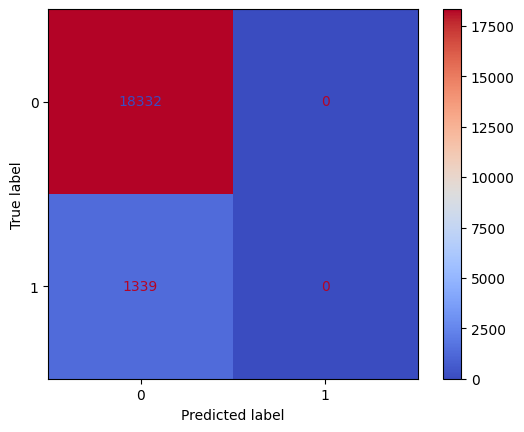

In [ ]:
c_matrix(y_test, y_pred_svm, svm_pipeline)

##### **Classification Report**

In [ ]:
class_report(y_test, y_pred_svm)

classification report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     18332
           1       0.00      0.00      0.00      1339

    accuracy                           0.93     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.87      0.93      0.90     19671



##### **ROC Curve**

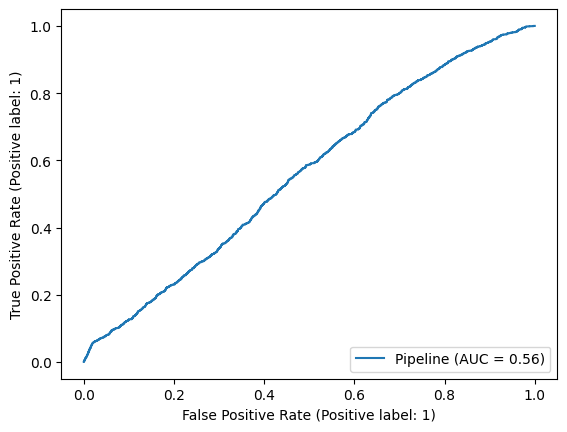

In [ ]:
roc_curve(svm_pipeline, X_test, y_test)

##### **Cost Matrix**

In [ ]:
cost_matrix(svm_pipeline, X_train, y_train)

average cost for simple pipeline= 7762.0


#### **Parameter Tuning**

##### **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_pipeline = Pipeline([
    ("preprocessing", pipeline),
    ("svm", SVC()),
])

param_grid = [
  {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100, 1000]},
  {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]},
]

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

##### **HalvingGridSearchCV**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

param_grid = [{
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 1]
}]

# Check what's in this parameter grid
print('The parameter grid: ')
print(param_grid)

# Change to the new strategy starting here
halving_grid_search = HalvingGridSearchCV(svm_pipeline, param_grid, cv=3,
                                          min_resources='exhaust',  # use all data in the last round, start with as needed
                                          scoring='balanced_accuracy')
halving_grid_search.fit(X_train, y_train)

The parameter grid: 
[{'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'svm__C': [0.1, 1, 10], 'svm__gamma': ['scale', 'auto', 0.1, 1]}]


HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7dd9e061b6a0>),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('cat_encoder',
                                                                                                 OneHotEncoder())]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7dd9e061b580>)])),
                                              ('svm',
                                               SVC(C=1, degree=1,
                                                   kernel='linear'))]),
                    param_grid=[{'svm__C': [0.1, 1, 10],
                                 'svm__gamma': ['scale', 'auto', 0.1, 1],
                                 'svm__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']}],
                    scoring='balanced_accuracy')

In [ ]:
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex='(iter|^param_|mean_test_score|n_resources)', axis=1).head()

The best parameters are  {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


,iter,n_resources,param_svm__C,param_svm__gamma,param_svm__kernel,mean_test_score
71,3,58995,1,auto,rbf,0.502532
70,3,58995,0.1,scale,linear,0.500000
65,2,19665,1,auto,rbf,0.501478
64,2,19665,1,auto,poly,0.500000
66,2,19665,1,0.1,linear,0.500000


##### **RandomSearchCV**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# Define the parameter distributions for RandomizedSearchCV
param_grid = [{
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 1]
}]

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(svm_pipeline, param_distributions=param_grid, n_iter=5, cv=3,
                                   scoring='balanced_accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print('The best parameters are ', random_search.best_params_)

# Get the best estimator
best_svm_estimator = random_search.best_estimator_

# Access other details if needed
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

##### **HalvingRandomSearchCV**

In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

# Define the parameter distributions for HalvingRandomSearchCV
param_distributions = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': reciprocal(0.1, 10),
    'svm__gamma': reciprocal(0.01, 1.0)
}

# Perform HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(svm_pipeline, param_distributions=param_distributions,
                                             factor=3, n_resources=100, random_state=42)
halving_random_search.fit(X_train, y_train)

# Print the best parameters
print('The best parameters are ', halving_random_search.best_params_)

# Get the best estimator
best_svm_estimator = halving_random_search.best_estimator_

# Access other details if needed
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
halving_random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
halving_random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()


#### **Model Retraining**

In [ ]:
from sklearn.svm import SVC

lin_svc = SVC(C=1, kernel='rbf',gamma='auto')

svm_pipeline = Pipeline([
    ("preprocessing", pipeline),
    ("svm", lin_svc),
])

svm_pipeline.fit(X_train, y_train)
#print(lin_svc.n_support_)
svm_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ada0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff6f07ace0>)])),
                ('svm', SVC(C=1, gamma='auto'))])

In [ ]:
# Assuming svm_pipeline is already defined and fitted
y_pred_svm_new = svm_pipeline.predict(X_test)

#### **Model Reevaluation**

##### **Balanced Accuracy**

In [ ]:
calculate_accuracy(y_test, y_pred_svm_new)

Accuracy=0.9323, Balanced Accuracy=0.5030


##### **Confusion Matrix**

confusion matrix=



array([[18332,     0],
       [ 1331,     8]])

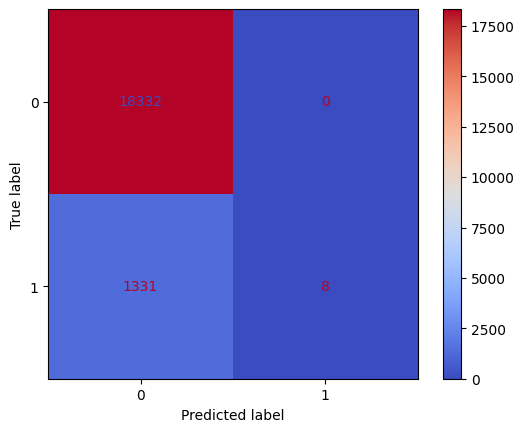

In [ ]:
c_matrix(y_test, y_pred_svm_new, svm_pipeline)

##### **Classification Report**

In [ ]:
class_report(y_test, y_pred_svm_new)

classification report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     18332
           1       1.00      0.01      0.01      1339

    accuracy                           0.93     19671
   macro avg       0.97      0.50      0.49     19671
weighted avg       0.94      0.93      0.90     19671



##### **ROC Curve**

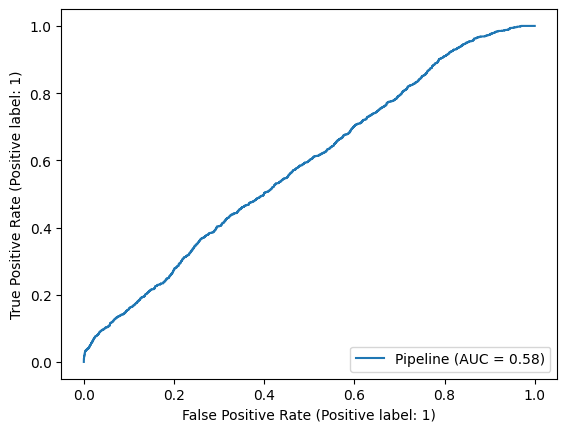

In [ ]:
roc_curve(svm_pipeline, X_test, y_test)

##### **Cost Matrix**

In [ ]:
cost_matrix(svm_pipeline, X_train, y_train)

average cost for simple pipeline= 7711.4


#### **Techniques for Dataset Imbalance**

#####**K-fold**

In [ ]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5, scoring='balanced_accuracy')
print(f'The balanced accuracy of K Nearest Neighbor is {svm_scores.mean():.3f}.')

The balanced accuracy of K Nearest Neighbor is 0.503.


##### **Balanced Weights**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Modify the pipeline to include balanced class weights
modified_svm_pipeline = svm_pipeline
modified_svm_pipeline.named_steps['svm'].set_params(class_weight='balanced')

# Fit the modified pipeline on training data
modified_svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modified_svm_pipeline.predict(X_test)

In [ ]:
calculate_accuracy(y_test, y_pred)

Accuracy=0.2905, Balanced Accuracy=0.5864


##### **SMOTE Technique**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

svc_smote_pipe = make_pipeline(pipeline, SMOTE(random_state=42), SVC(C=1, kernel='rbf', gamma='auto'))
svc_smote_pipe
svc_smote_pipe.fit(X_train, y_train)
y_pred = svc_smote_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')

Accuracy=0.3050, Balanced Accuracy=0.5904


The performance of the SVM model in predicting our dataset proved to be less than satisfactory. Despite exhaustive efforts in hyperparameter tuning, the balanced accuracy remained stagnant at 0.50, with the best parameters identified as C=1, kernel='rbf', and gamma='auto' through the Halving Grid Search Model.

While alternative search parameters were considered for SVM, the iterative exploration encountered challenges, notably infinite loops and considerable time consumption. As a pragmatic solution, we opted for the Halving Grid Search, prioritizing efficiency and practicality.

Despite diligent efforts in addressing class imbalance, the SVM model exhibited limited improvement in balanced accuracy. This observation underscores the inherent complexities and challenges associated with optimizing SVM for our specific dataset. Nevertheless, our commitment to exploring various avenues for improvement remains steadfast, reflecting the dynamic and iterative nature of model refinement.

###**7.5 Voting**

####**Balanced Accuracy**

In [ ]:
from sklearn.ensemble import VotingClassifier



clf_voting = VotingClassifier(
    estimators=[
        ('lr', logis_smote_pipe),
     ('rf', rf_smote_pipe),
      ('knn', knn_smote_pipe),
       ('svm',svc_smote_pipe) ])


clf_voting.fit(X_train, y_train)
y_pred_voting = clf_voting.predict(X_test)
calculate_accuracy(y_test, y_pred_voting)

Accuracy=0.8910, Balanced Accuracy=0.7643


####**Confusion Matrix**

confusion matrix=



array([[16700,  1632],
       [  512,   827]])

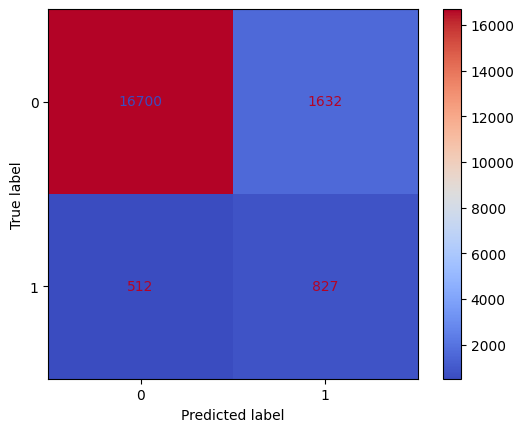

In [ ]:
c_matrix(y_test, y_pred_voting, clf_voting)

####**Classification Report**

In [ ]:
class_report(y_test, y_pred_voting)

classification report=
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     18332
           1       0.34      0.62      0.44      1339

    accuracy                           0.89     19671
   macro avg       0.65      0.76      0.69     19671
weighted avg       0.93      0.89      0.91     19671



####**Cost Matrix**

In [ ]:
cost_matrix(clf_voting, X_train, y_train)

average cost for simple pipeline= 4172.0


###**Final Chosen Model Reevaluation(KNN-SMOTE)**

To select the final model according to our results for better understanding we have plotted graphs representing the Balanced accuracy and accuracy of various models.


The graphical representation below offers insights into the accuracy and balanced accuracies of models prior to undergoing Hyperparameter Tuning and efforts to address class imbalances. The conspicuous gap observed in the accuracies underscores the pronounced impact of class imbalance on model performance.

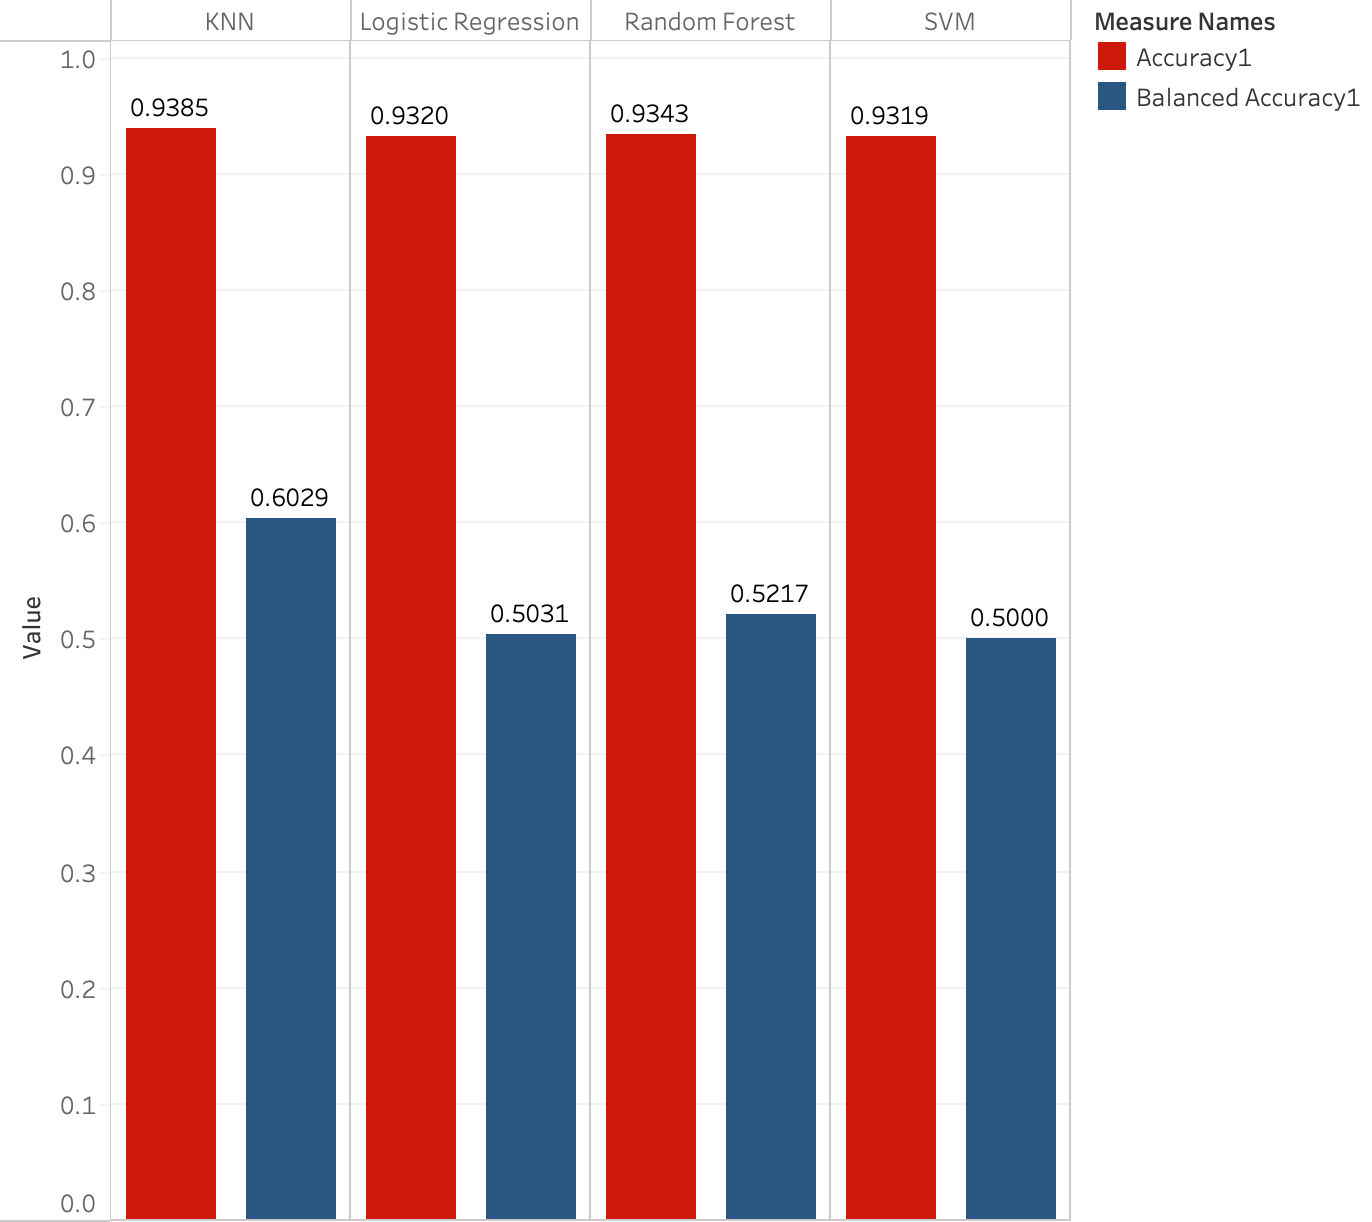

Moving ahead, the selection of the optimal model for predictions became paramount. The graph below illustrates the balanced accuracy of the retrained model, comparing its performance before and after the application of class imbalance techniques.

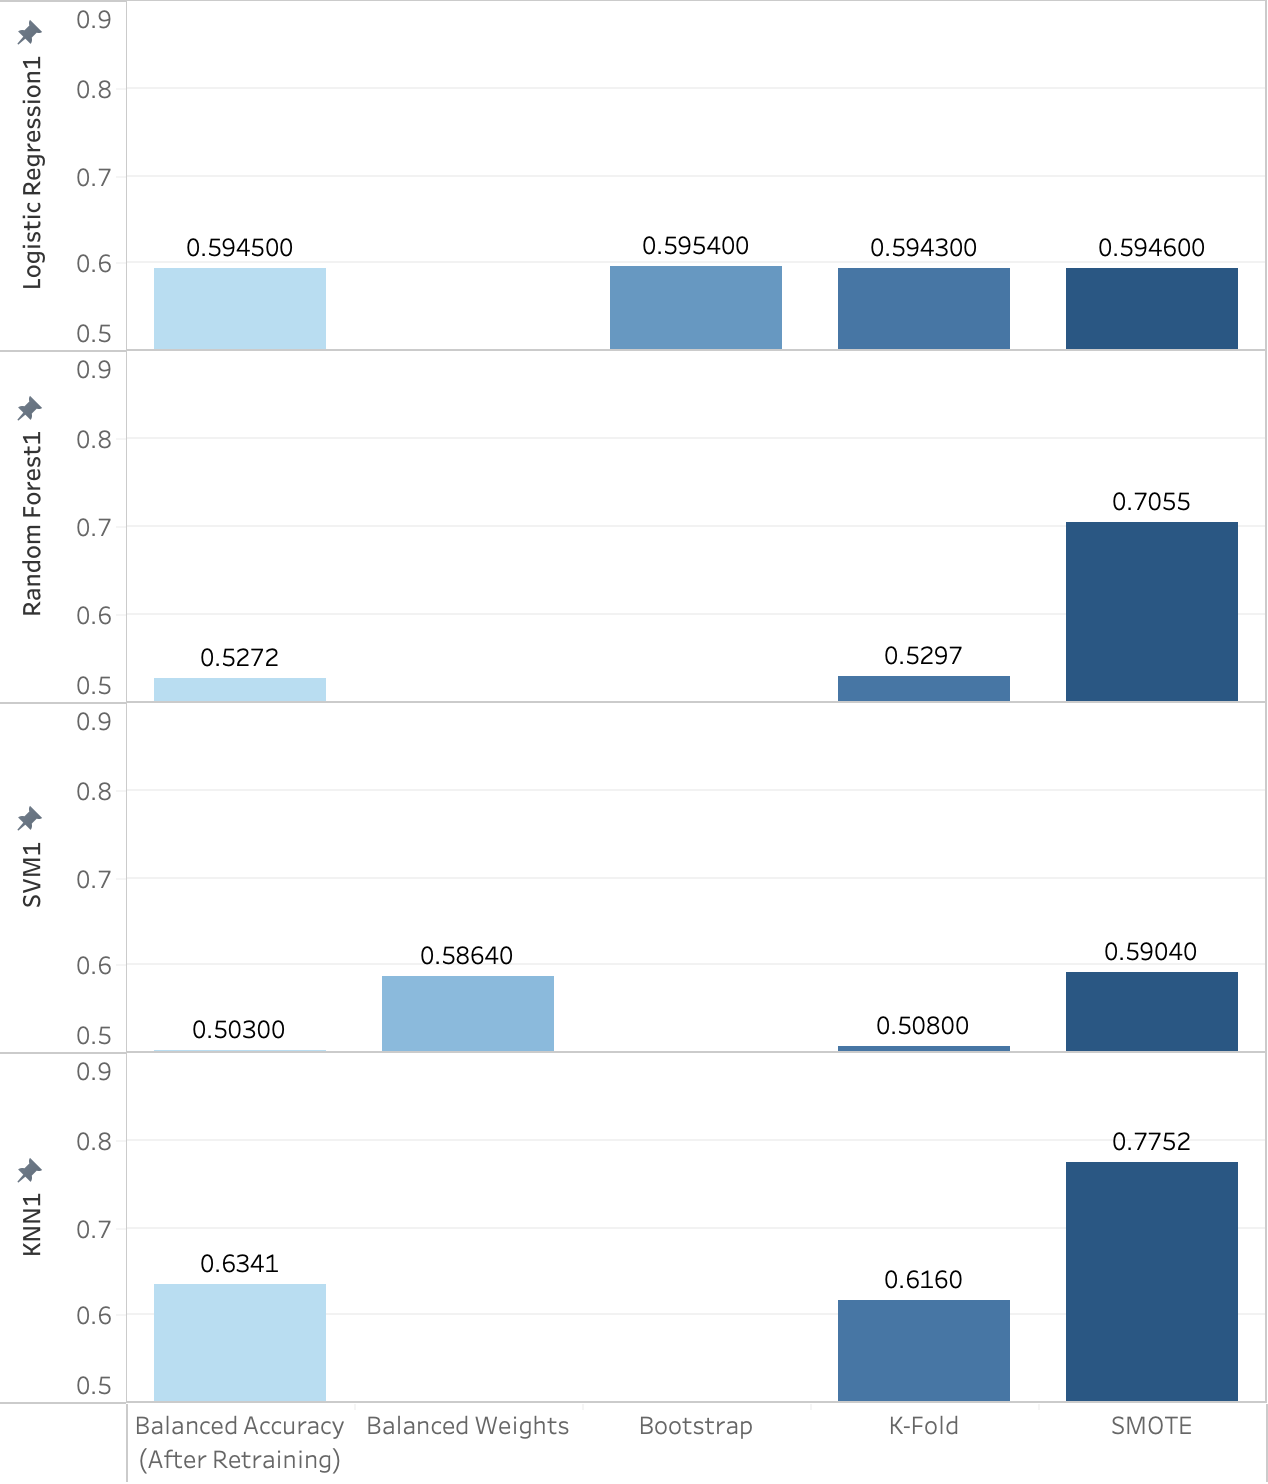

Analyzing the graph it is evident that the KNN SMOTE is the best Model so far to move ahead with for the predictions and our analysis as it gives us the best Balanced Accuracy.
KNN is non-parametric and flexible, making it suitable for capturing intricate relationships in the data, especially when decision boundaries are complex or non-linear.
SMOTE is a technique used to address class imbalance in the dataset by generating synthetic samples for the minority class.
The hyperparameters we set for KNN are p=1, n_neighbors=2 p=1: This typically refers to the choice of the Manhattan distance (L1 norm) as the distance metric. It calculates the distance between two points as the sum of the absolute differences of their coordinates. The choice of distance metric depends on the characteristics of your data and problem.
n_neighbors=2: This parameter defines the number of neighbors to consider when making predictions. Choosing a small value like 2 may result in a more flexible and sensitive model to local patterns in the data. However, it can also make the model more susceptible to noise.
KNN is non-parametric and flexible, making it suitable for capturing intricate relationships in the data, especially when decision boundaries are complex or non-linear.

####**Balanced Accuracy**

In [ ]:
calculate_accuracy(y_test, y_pred2_smote)

Accuracy=0.9178, Balanced Accuracy=0.7752


####**Confusion Matrix**

confusion matrix=



array([[17237,  1095],
       [  522,   817]])

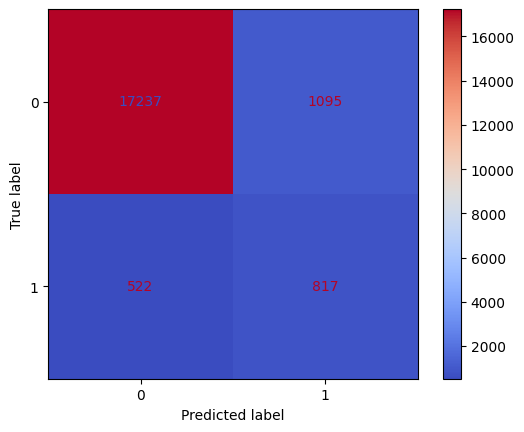

In [ ]:
c_matrix(y_test, y_pred2_smote, knn_smote_pipe)

####**Classification Report**

In [ ]:
class_report(y_test, y_pred2_smote)

classification report=
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     18332
           1       0.43      0.61      0.50      1339

    accuracy                           0.92     19671
   macro avg       0.70      0.78      0.73     19671
weighted avg       0.93      0.92      0.92     19671



####**ROC Curve**

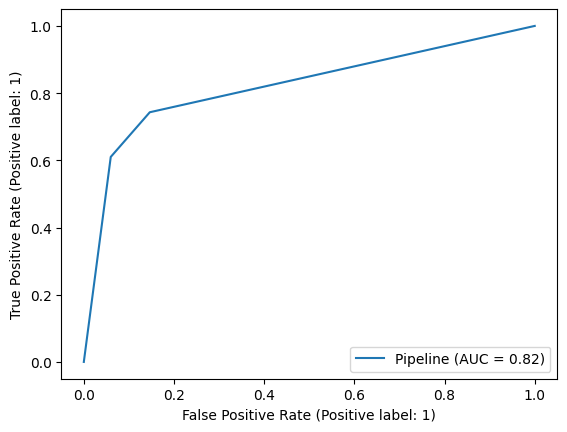

In [ ]:
roc_curve(knn_smote_pipe, X_test, y_test)

####**Cost Matrix**

In [ ]:
cost_matrix(knn_smote_pipe, X_train, y_train)

average cost for simple pipeline= 3960.8


###**7.6 Final Prediction**

In [ ]:
y_pred2_smote2 = knn_smote_pipe.predict(X)
df1 = df.copy()
df1['predict_bankrupt'] = y_pred2_smote2
df1 # df1 = add the new prediction on the original dataset(df)

is_bankruptcy  Current assets  Cost of goods sold  \
company_name year                                                      
C_1          1999              0         511.267             833.107   
             2000              0         485.856             713.811   
             2001              0         436.656             526.477   
             2002              0         396.412             496.747   
             2003              0         432.204             523.302   
...                          ...             ...                 ...   
C_8971       2014              0         233.211              43.338   
             2015              0         105.559              59.184   
             2016              0          63.971              69.074   
             2017              0         135.207              66.527   
             2018              0          82.589              68.817   

                   Depreciation and amortization   EBITDA  Inventory  \
company_name year                                                      
C_1          1999                         18.373   89.031    336.018   
             2000                         18.577   64.367    320.590   
             2001                         22.496   27.207    286.588   
             2002                         27.172   30.745    259.954   
             2003                         26.680   47.491    247.245   
...                                          ...      ...        ...   
C_8971       2014                         14.094   45.615      3.376   
             2015                         42.592  202.133      2.288   
             2016                         65.057   79.051      2.581   
             2017                         65.330   69.171      2.013   
             2018                         65.201   67.262      2.112   

                   Net Income  Total Receivables  Market Value  Net Sales  \
company_name year                                                           
C_1          1999      35.163            128.348      372.7519   1024.333   
             2000      18.531            115.187      377.1180    874.255   
             2001     -58.939             77.528      364.5928    638.721   
             2002     -12.410             66.322      143.3295    606.337   
             2003       3.504            104.661      308.9071    651.958   
...                       ...                ...           ...        ...   
C_8971       2014      25.261             22.846      756.4827    104.223   
             2015     129.688             54.611      527.5750    291.153   
             2016      -1.442             42.467      578.8868    169.858   
             2017     -20.401             27.217      412.6241    161.884   
             2018     -50.946             45.839      354.1786    160.513   

                   Total Assets  Total Long-term Debt     EBIT  Gross Profit  \
company_name year                                                              
C_1          1999       740.998               180.447   70.658       191.226   
             2000       701.854               179.987   45.790       160.444   
             2001       710.199               217.699    4.711       112.244   
             2002       686.621               164.658    3.573       109.590   
             2003       709.292               248.666   20.811       128.656   
...                         ...                   ...      ...           ...   
C_8971       2014      1099.101               184.666   31.521        60.885   
             2015      1865.926               770.103  159.541       231.969   
             2016      1746.235               683.985   13.994       100.784   
             2017      1736.110               694.035    3.841        95.357   
             2018      1625.370               632.122    2.061        91.696   

                   Total Current Liabilities  Retained Earnings  \
company_name year                  

In [ ]:
alivedf1 = df1[df1['predict_bankrupt']==0]
faileddf1 = df1[df1['predict_bankrupt']==1]
print('basic statistics about the alive company dataset (include = "number"):')
display(alivedf1.describe(include = 'number'))
print('basic statistics about the failed company dataset (include = "number"):')
display(faileddf1.describe(include = 'number'))

basic statistics about the alive company dataset (include = "number"):


,is_bankruptcy,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,predict_bankrupt
count,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,7.289000e+04,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.000000,72890.0
mean,0.007175,919.641944,1655.249681,124.386420,396.495107,209.889237,143.498819,299.481590,3.618874e+03,2461.642678,2967.515471,733.204506,272.108542,806.393111,632.273175,586.744846,2461.642678,1818.429628,2065.147598,0.0
std,0.084403,4066.882328,9242.547560,673.916692,2084.059773,1094.011669,1303.855903,1382.600192,1.909718e+04,12370.953151,13337.404277,3318.835009,1547.672372,3910.838492,3032.882600,6596.012562,12370.953151,8286.054262,10782.557289,0.0
min,0.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000,0.0
25%,0.000000,19.289250,17.151500,1.188000,-0.610000,0.000000,-6.287000,3.420000,3.594120e+01,28.018750,37.859500,0.000000,-2.333750,8.915000,8.827250,-62.774750,28.018750,13.351000,33.075000,0.0
50%,0.000000,103.392500,104.322000,7.971000,15.822000,7.205000,2.157000,23.626500,2.426296e+02,188.548500,216.136000,7.057500,7.360500,65.436000,43.572000,-0.002500,188.548500,81.200000,171.355500,0.0
75%,0.000000,453.069000,658.140000,48.235750,145.798750,77.602500,44.062750,137.067750,1.334322e+03,1092.605750,1207.959250,246.048000,93.300000,359.248000,230.761250,161.432250,1092.605750,637.286000,911.418500,0.0
max,1.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000,0.0


basic statistics about the failed company dataset (include = "number"):


,is_bankruptcy,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,predict_bankrupt
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.0
mean,0.810946,386.046215,830.383940,81.565534,128.393766,97.360935,-48.266364,127.652074,840.555791,1135.473712,1603.555791,587.566787,46.828232,305.089772,330.682565,-150.597021,1135.473712,1208.947542,1007.079946,1.0
std,0.391585,1119.295540,2785.079876,253.758486,518.106680,460.458992,573.049955,403.122021,3078.639202,3515.478844,5153.768371,2040.308534,395.878152,921.392672,1203.856332,1746.390517,3515.478844,4091.377077,3270.758436,0.0
min,0.000000,0.001000,-0.666000,0.000000,-8218.500000,0.000000,-27446.000000,0.000000,0.001300,-0.234000,0.005000,0.000000,-10537.000000,-8001.000000,0.005000,-43091.000000,-0.234000,0.005000,-0.016000,1.0
25%,1.000000,14.995500,15.802000,1.239000,-5.013500,0.029250,-27.060000,2.139250,26.403475,21.116250,32.222000,0.175750,-10.437250,4.256000,9.554750,-139.146750,21.116250,15.373750,30.450000,1.0
50%,1.000000,74.146000,96.707500,7.590000,5.929000,5.456000,-3.882000,14.266000,118.443050,160.614000,183.981000,16.480500,0.030000,42.845500,40.277500,-27.371500,160.614000,90.822500,143.558500,1.0
75%,1.000000,258.937000,444.781000,45.370250,79.491750,48.057000,8.092250,78.459750,504.684350,678.461500,811.636000,278.401000,35.271750,217.737750,154.569250,33.584750,678.461500,548.848000,580.510250,1.0
max,1.000000,16103.000000,40683.000000,5475.000000,6136.000000,9963.000000,4504.000000,6786.000000,139092.655000,53012.000000,76995.000000,21586.000000,4822.000000,15192.000000,41695.000000,7832.000000,53012.000000,64092.000000,49363.000000,1.0


In [ ]:
a = alivedf1.describe(include = 'number').iloc[1] # a dataset represent the alive company info only display mean result
b = faileddf1.describe(include = 'number').iloc[1] # b dataset represent the alive company info only display mean result
a.drop(['is_bankruptcy','predict_bankrupt'],inplace=True)
b.drop(['is_bankruptcy','predict_bankrupt'],inplace=True)

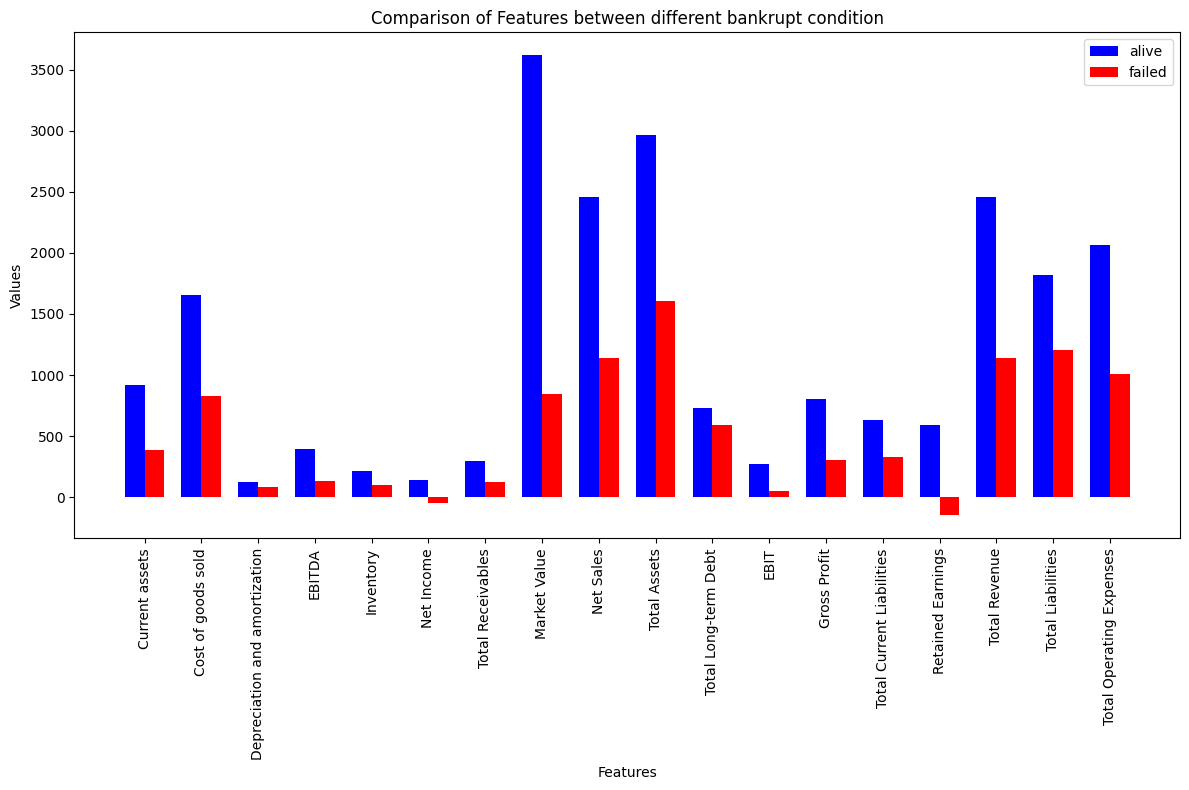

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


features = a.index
values_a = a.values
values_b = b.values

bar_width=0.35
index = np.arange(len(features))

plt.figure(figsize=(12, 8))
plt.bar(index, values_a , bar_width, label='alive',color = 'blue')
plt.bar(index + bar_width, values_b , bar_width, label='failed',color = 'red')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Comparison of Features between different bankrupt condition')
plt.xticks(index + bar_width / 2, features, rotation='vertical')
plt.legend()
plt.tight_layout()

plt.show()

**Insights**

From financial metrics, the mean current assets for alive companies stand substantially higher than for failed companies, pointing to successful companies maintaining elevated levels of liquid assets, a contributing factor to their financial stability. In contrast, alive companies exhibit positive net income on average, whereas failed companies show a negative net income, underscoring the financial losses experienced by failed companies leading to bankruptcy.

Surprisingly, our anticipation regarding higher long-term debt and total liabilities for failed companies is contradicted. This suggests that successful companies may be more open to leveraging long-term financing for strategic growth or investments. Moreover, these successful companies adeptly manage financial obligations to sustain their operations. Operationally, alive companies boast higher EBITDA, indicative of robust cash flows from operational activities. However, they also incur higher operating expenses, hinting at the costs associated with maintaining successful operations.

From a market value perspective, alive companies exhibit substantially higher values compared to failed companies, signaling heightened investor confidence in the future potential and performance of successful companies. These insights drive our motivation throughout the project and hold importance for stakeholders, investors, and financial institutions seeking a nuanced understanding of the risks associated with companies' financial health and bankruptcy potential.

##**8. Challenge**

Given the highly imbalanced nature of our dataset, where approximately 97% of datapoints represent the "alive" class and only 3% represent the "failed" class, we implement several strategies for effective evaluation.

Firstly, in response to the challenge posed by imbalanced datasets, we prioritize balanced accuracy over traditional accuracy metrics when assessing our models. Traditional accuracy can be misleading in imbalanced scenarios as it tends to favor the majority class. Balanced accuracy, which considers the mean of sensitivity and specificity, offers a more reliable evaluation across all classes.

Secondly, in our model tuning, we incorporate the `class_weight='balanced' ` hyperparameter to address the impact of imbalanced data. This adjustment ensures that the model assigns appropriate weights to different classes during training, giving emphasis to the minority class and enhancing predictive accuracy for both major and minor classes.

Thirdly, we employ resampling techniques, specifically over-sampling, to tackle the imbalance. This involves duplicating or generating synthetic samples for the minority class, providing the model with more instances to learn and distinguish patterns related to that class. This technique is crucial in preventing bias towards the majority class and fostering a more equitable model.

Fourthly, we also leverage the SMOTE (Synthetic Minority Over-sampling Technique) method to address the imbalanced problem. SMOTE helps by creating new data points for the smaller group, making the data more balanced. This way, the model can learn better from both groups and make fair predictions.

Lastly, K-fold cross-validation serves as an additional tool to address this problem. Specifically, K-fold cross-validation, when combined with these strategies, helps us navigate the challenges posed by imbalanced datasets.

Through these thoughtful approaches, our goal is to enhance the robustness and fairness of our machine learning models in the context of imbalanced datasets.

##**9. Conclusion**

In our comprehensive project journey, our primary objective was to craft a classification model that excels in balanced accuracy, particularly within the intricate landscape of a highly imbalanced dataset. Our exploration spanned various models, encompassing Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM). Despite exhaustive efforts in training diverse models, the incremental gains in balanced accuracy were modest.

Beyond model selection, our focus extended to feature selection, delving into the nuanced impact of each variable on shaping the growth and success trajectories of the companies under scrutiny.

In summary, our project underscores the paramount importance of achieving peak accuracy in predictive modeling. The preference for KNN SMOTE signifies its adeptness in navigating imbalanced data challenges. Additionally, insights gained from feature selection illuminate how specific variables shape the growth dynamics of companies.

Further enriching our understanding is the recognition that stakeholders hold different perspectives on particular issues. For companies, a grasp of their financial health guides future plans, influencing decisions to earn more, spend judiciously, or seek external assistance. Simultaneously, investors keenly analyze a company's financial standing to make informed investment decisions, directing capital where growth potential is perceived. Predicting a company's trajectory, therefore, becomes pivotal for both business entities and investors alike, shaping strategic actions and investment choices. Ultimately, our work not only aids investors in making well-informed decisions but also empowers companies to navigate toward success with a nuanced understanding of their growth dynamics.